#### IMPORTING REQUIRED LIBRARIES

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #import Decision tree
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier #import randomforest Classifier
from sklearn.ensemble import AdaBoostClassifier #import adaboostclassifer
import xgboost as xgb

#import Scoring metric
from sklearn.metrics import accuracy_score,recall_score,f1_score,fbeta_score,classification_report 

In [86]:
import pandas as pd
data=pd.read_csv("TrainingData.csv")
data

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
0,Central NY,Onondaga,636.0,50 to 69,M,White,Not Span/Hispanic,5,Elective,Home or Self Care,...,1.0,Medical,0,N,N,8990.22,4801.74,0.534107,1,1
1,Western NY,Erie,210.0,50 to 69,M,White,Not Span/Hispanic,6,Emergency,Another Type Not Listed,...,2.0,Medical,0,N,Y,11604.62,7420.40,0.639435,2,0
2,Hudson Valley,Westchester,1122.0,0 to 17,F,Other Race,Unknown,2,Newborn,Home or Self Care,...,1.0,Medical,3400,N,N,3072.25,947.56,0.308424,3,0
3,Western NY,Erie,3067.0,0 to 17,F,White,Not Span/Hispanic,3,Newborn,Home or Self Care,...,1.0,Medical,4000,N,N,3906.92,2048.56,0.524342,2,0
4,New York City,Bronx,1168.0,50 to 69,M,Black/African American,Not Span/Hispanic,5,Emergency,Home w/ Home Health Services,...,3.0,Medical,0,N,Y,44588.10,9461.28,0.212193,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838855,Hudson Valley,Rockland,776.0,70 or Older,F,Black/African American,Not Span/Hispanic,3,Emergency,Home or Self Care,...,3.0,Medical,0,N,Y,19334.31,4052.27,0.209590,2,0
838856,Finger Lakes,Monroe,409.0,50 to 69,M,White,Not Span/Hispanic,8,Emergency,Home w/ Home Health Services,...,2.0,Medical,0,N,Y,18326.20,8070.47,0.440379,3,0
838857,Hudson Valley,Westchester,1129.0,70 or Older,F,White,Not Span/Hispanic,3,Emergency,Skilled Nursing Home,...,2.0,Medical,0,N,Y,12807.98,6835.37,0.533681,2,1
838858,Capital/Adirond,Warren,1005.0,30 to 49,M,White,Not Span/Hispanic,8,Urgent,Home or Self Care,...,2.0,Medical,0,N,N,20933.82,8294.48,0.396224,2,0


In [138]:
## show no. of rows and columns
data.shape

(1043761, 24)

In [139]:
## show all columns in dataframe
data.columns

Index(['Unnamed: 0', 'Area_Service', 'Hospital County', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [140]:
## show data type of each variable
data.dtypes

Unnamed: 0                                 int64
Area_Service                              object
Hospital County                           object
Age                                       object
Gender                                    object
Cultural_group                            object
ethnicity                                 object
Days_spend_hsptl                          object
Admission_type                            object
Home or self care,                        object
ccs_diagnosis_code                         int64
ccs_procedure_code                         int64
apr_drg_description                       object
Code_illness                               int64
Mortality risk                           float64
Surg_Description                          object
Weight_baby                                int64
Abortion                                  object
Emergency dept_yes/No                     object
Tot_charg                                float64
Tot_cost            

In [141]:
## finding No of null values in each column
data.isnull().sum()

Unnamed: 0                               0
Area_Service                             0
Hospital County                          0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

In [142]:
## show description of the data in the DataFrame
data.describe()

,Unnamed: 0,ccs_diagnosis_code,ccs_procedure_code,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
count,1.043761e+06,1.043761e+06,1.043761e+06,1.043761e+06,1.043761e+06,1.043761e+06,1.043761e+06,1.043761e+06,1.043761e+06,1.043761e+06,1.043761e+06
mean,5.218800e+05,1.986323e+02,9.710571e+01,2.056074e+00,1.752038e+00,2.820468e+02,2.719014e+04,1.050118e+04,4.563044e-01,7.493938e-01,1.937839e+00
std,3.013080e+05,1.654961e+02,8.726747e+01,9.140478e-01,9.872740e-01,9.323010e+02,5.497646e+04,2.234593e+04,8.046015e-01,4.333623e-01,7.717739e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.100000e-01,1.000000e-01,3.312909e-02,0.000000e+00,1.000000e+00
25%,2.609400e+05,1.080000e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,7.473550e+03,3.262180e+03,3.133930e-01,0.000000e+00,1.000000e+00
50%,5.218800e+05,1.590000e+02,8.800000e+01,2.000000e+00,1.000000e+00,0.000000e+00,1.466925e+04,5.955360e+03,4.090151e-01,1.000000e+00,2.000000e+00
75%,7.828200e+05,2.180000e+02,1.720000e+02,3.000000e+00,3.000000e+00,0.000000e+00,2.924230e+04,1.137738e+04,5.187984e-01,1.000000e+00,3.000000e+00
max,1.043760e+06,6.700000e+02,2.310000e+02,4.000000e+00,4.000000e+00,9.000000e+03,6.196974e+06,2.562478e+06,1.575596e+02,1.000000e+00,5.000000e+00


### EXPLORATORY DATA ANALYSIS 

#### Uni-variate Analysis of Numerical Variable

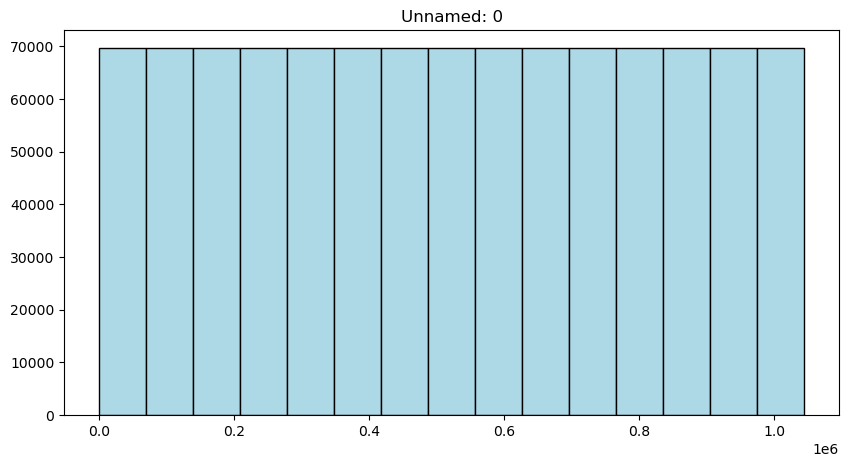

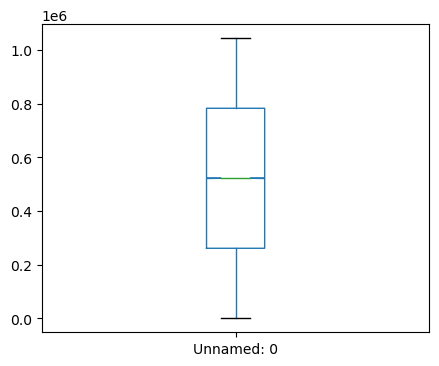

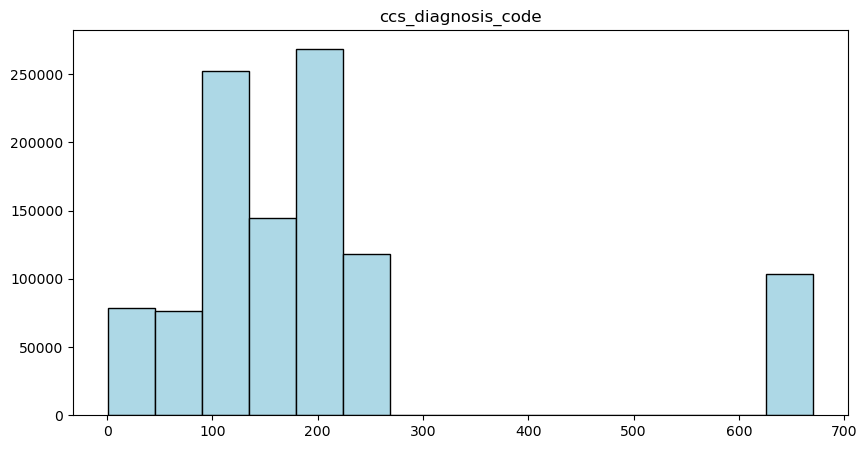

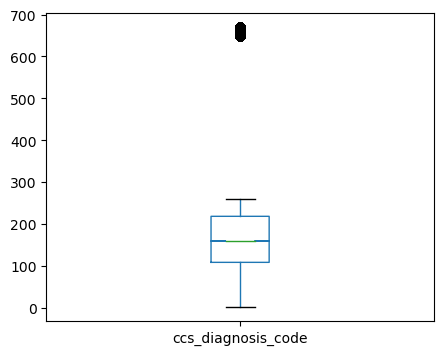

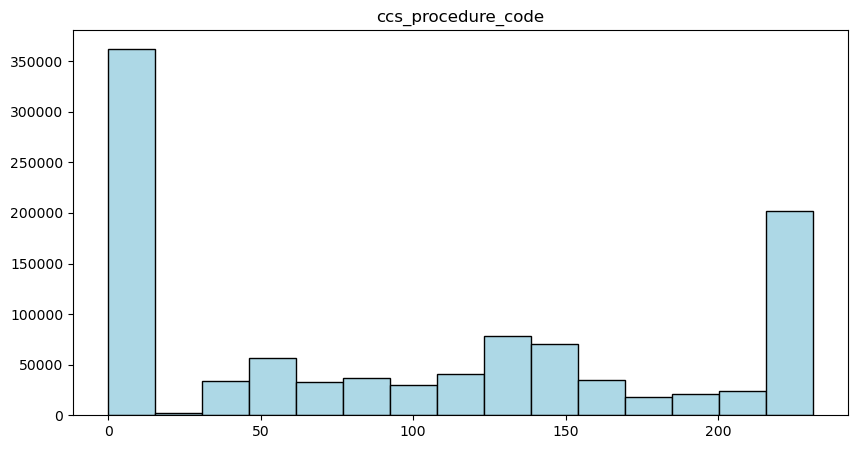

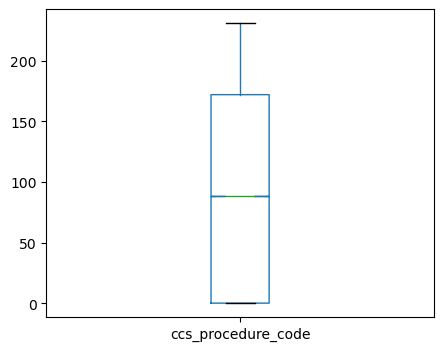

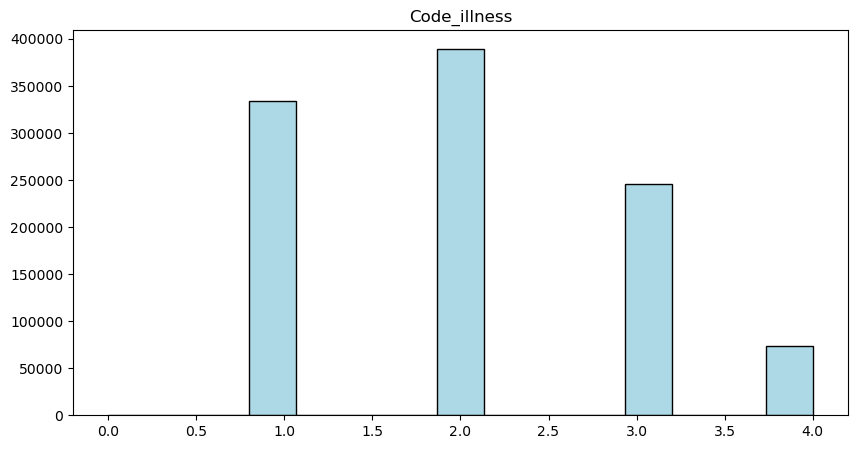

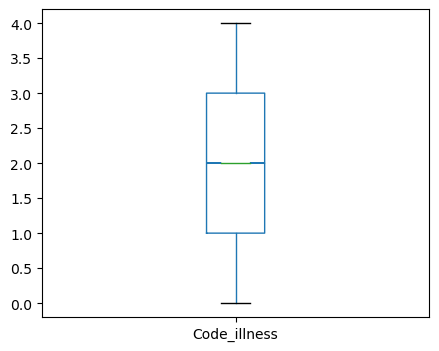

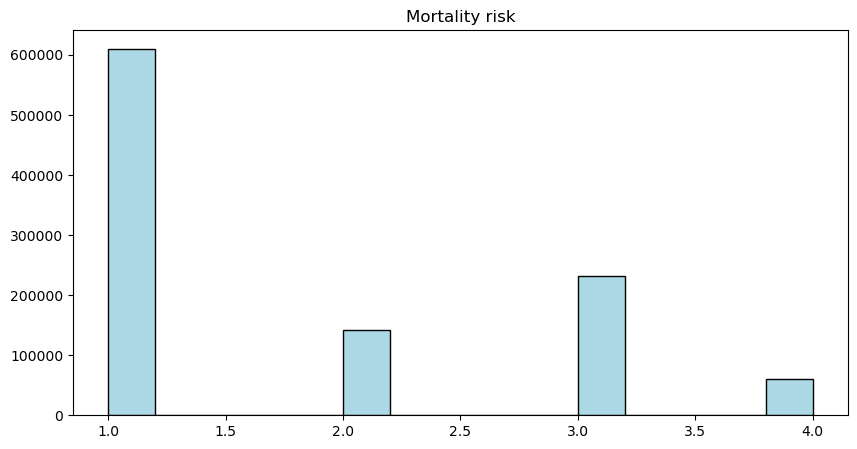

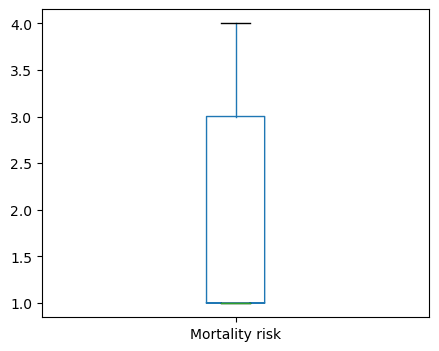

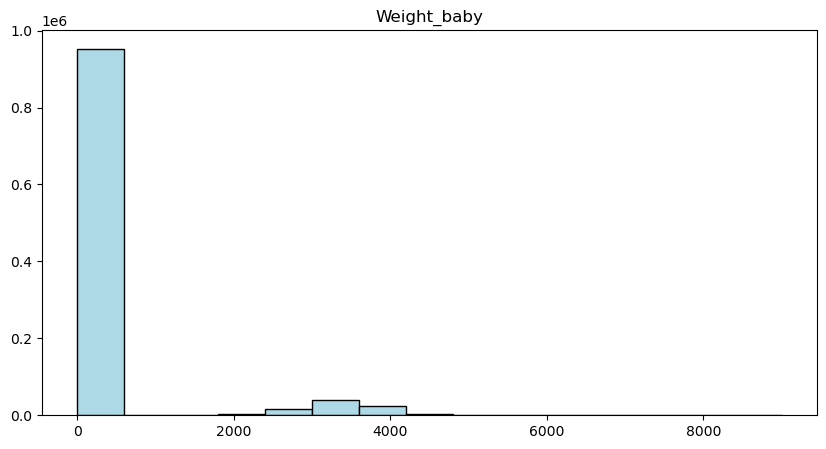

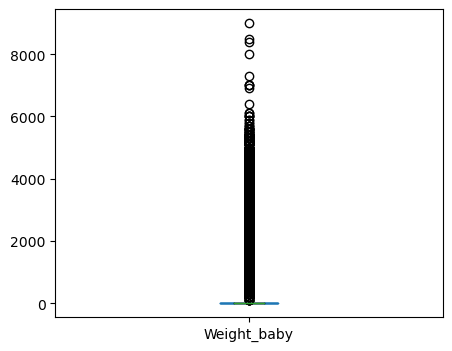

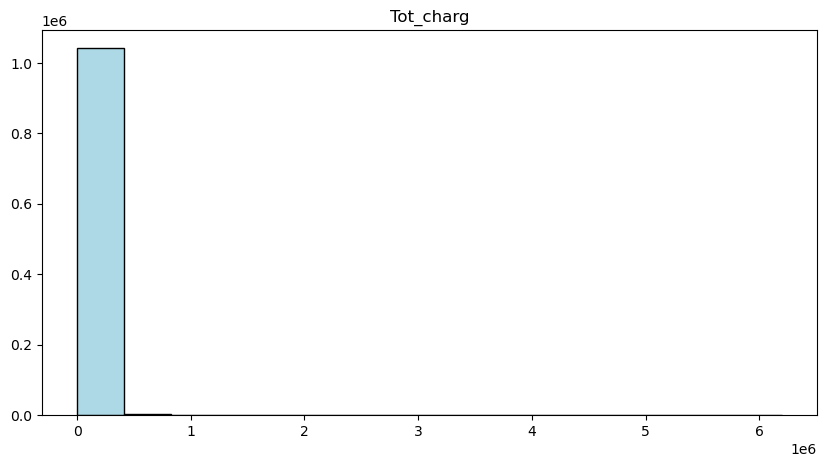

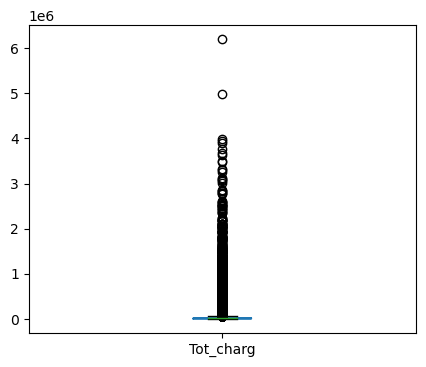

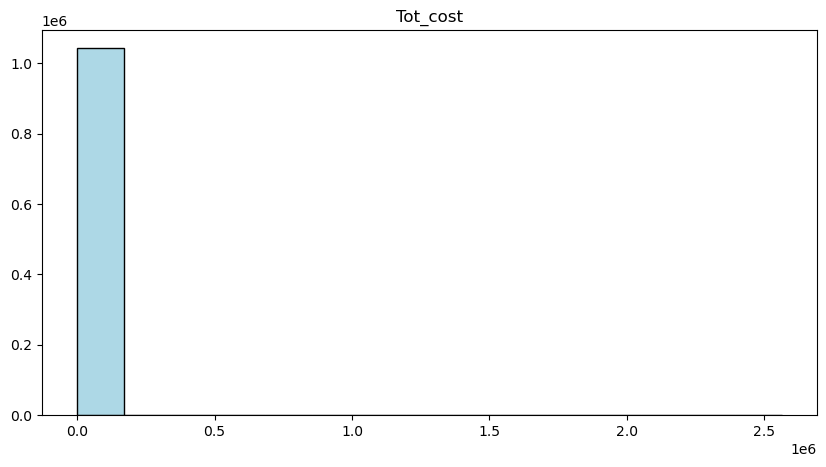

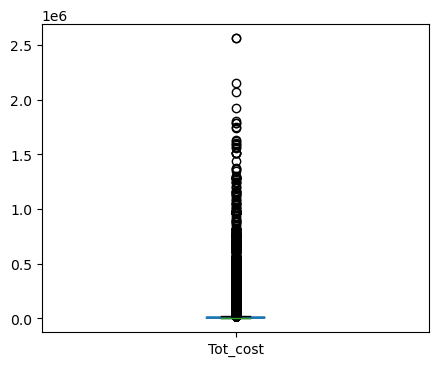

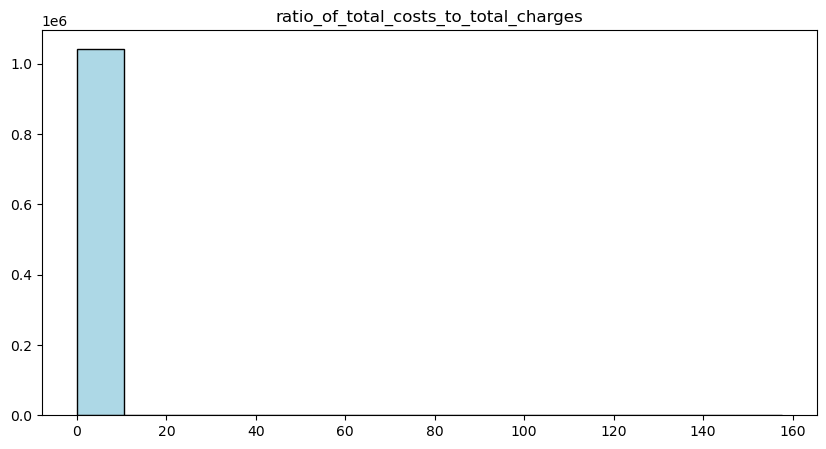

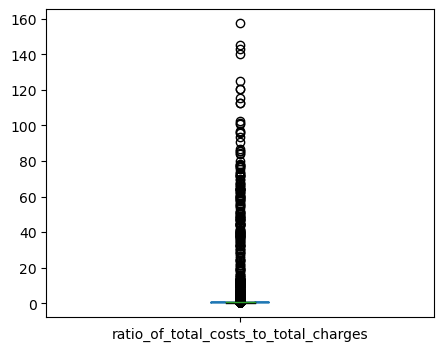

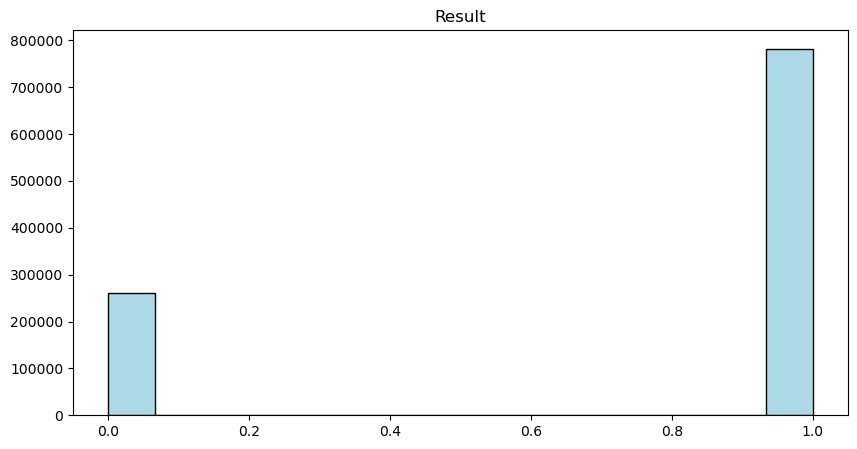

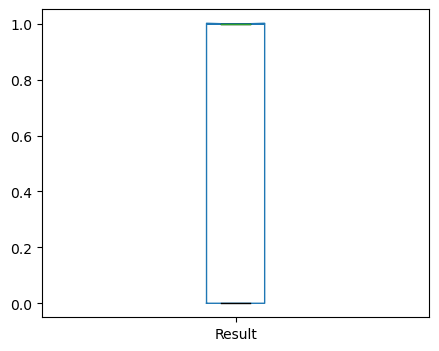

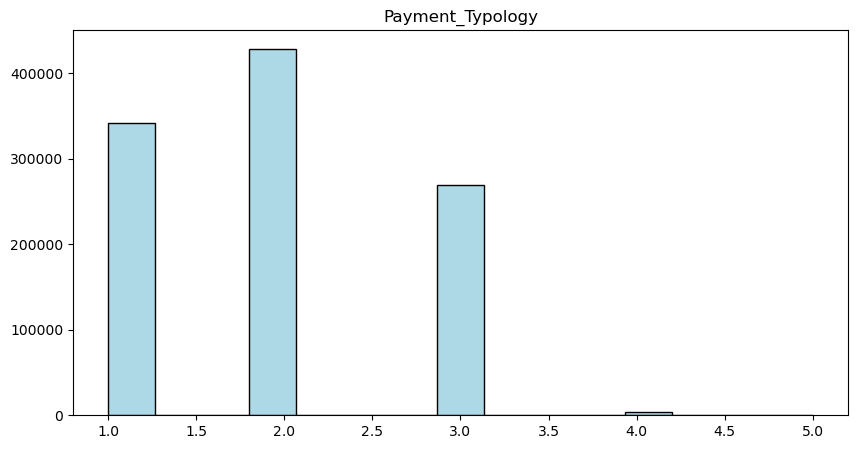

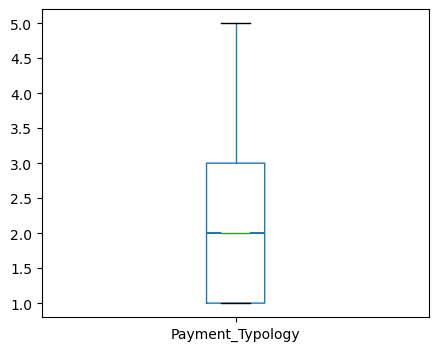

In [143]:
numerical = data.select_dtypes(exclude='object')
for col in numerical.columns:
    #histogram
    numerical.hist(column = col,
              grid=False,        #Do not include the grid
              figsize=(10,5),
             color="lightblue",
             edgecolor="black",
             bins=15)            #(Length,Height) of the plot in inches
    plt.show()
    #boxplot
    numerical.boxplot(column= col,
                grid= False,
                figsize=(5,4),
                notch=True)
    plt.show()

#### Uni-variate Analysis of Categorical Variable

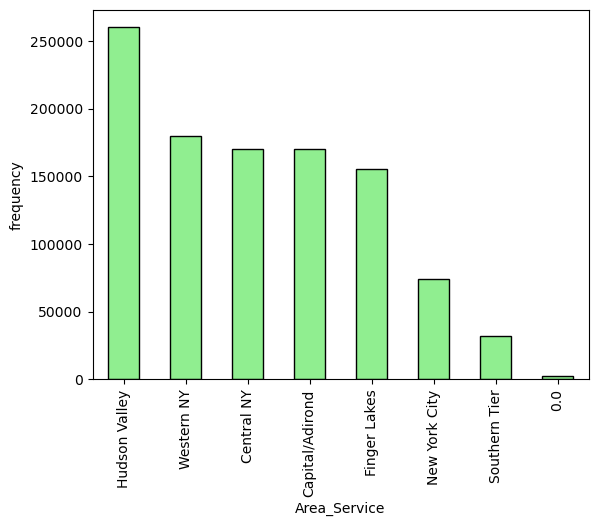

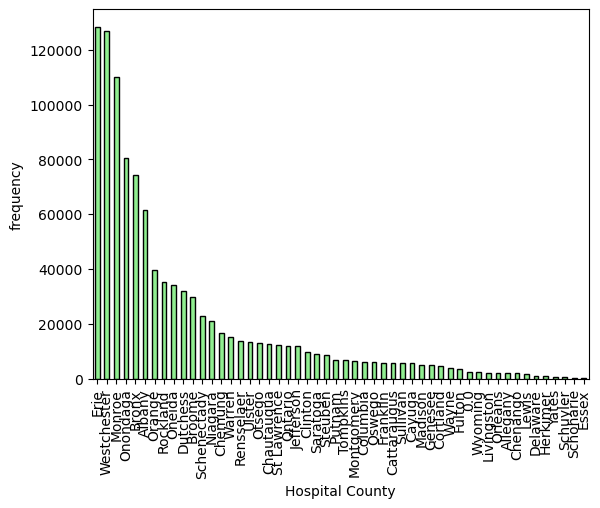

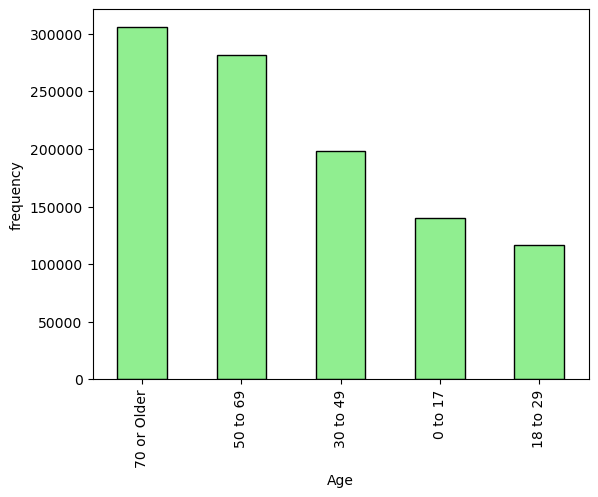

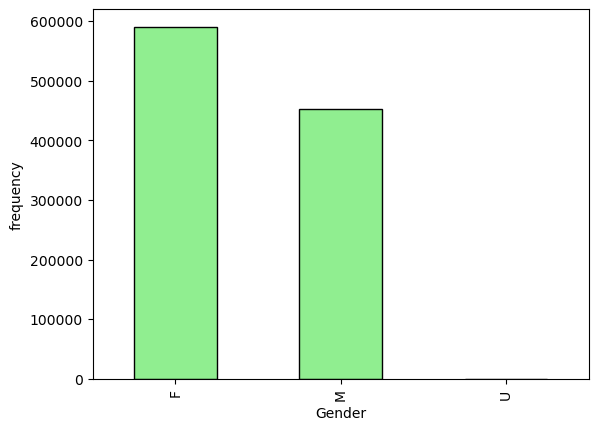

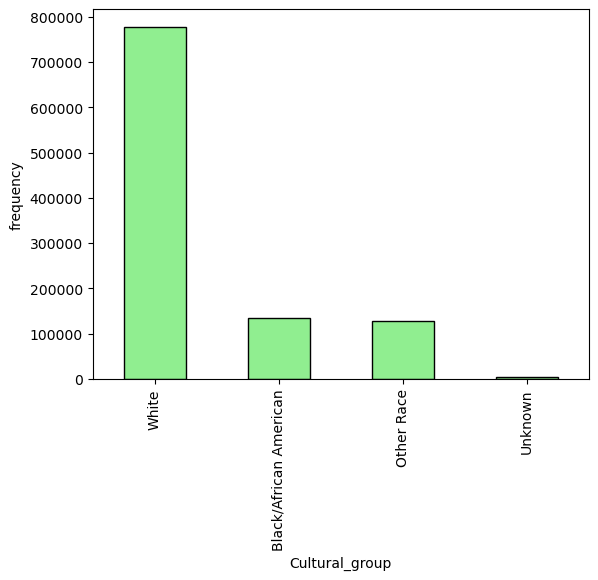

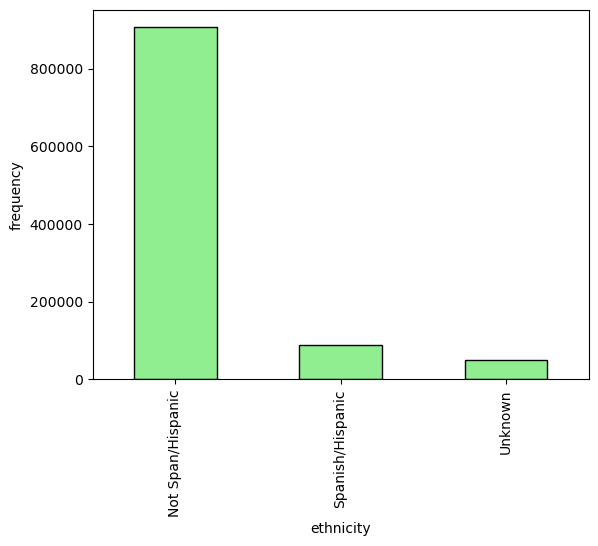

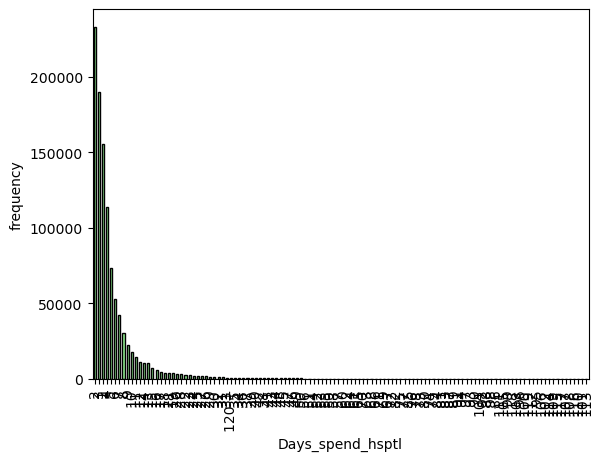

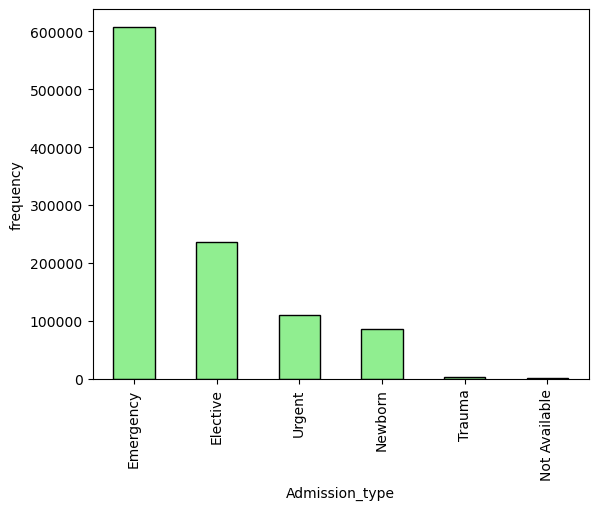

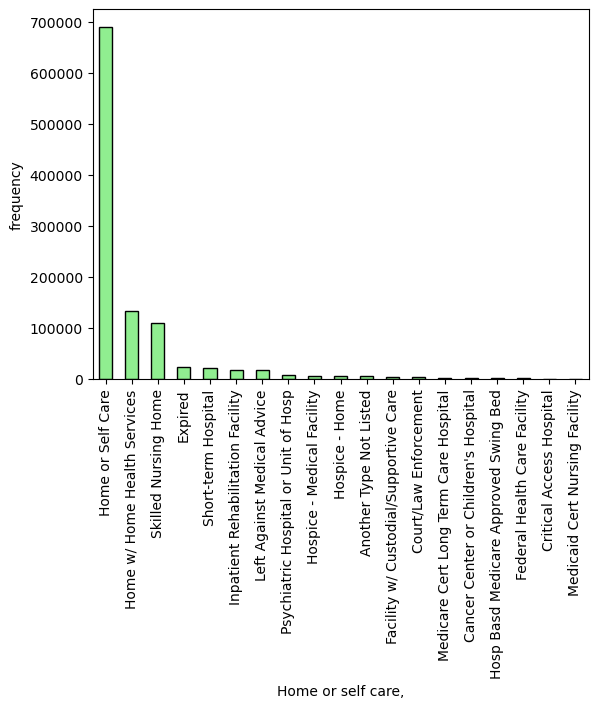

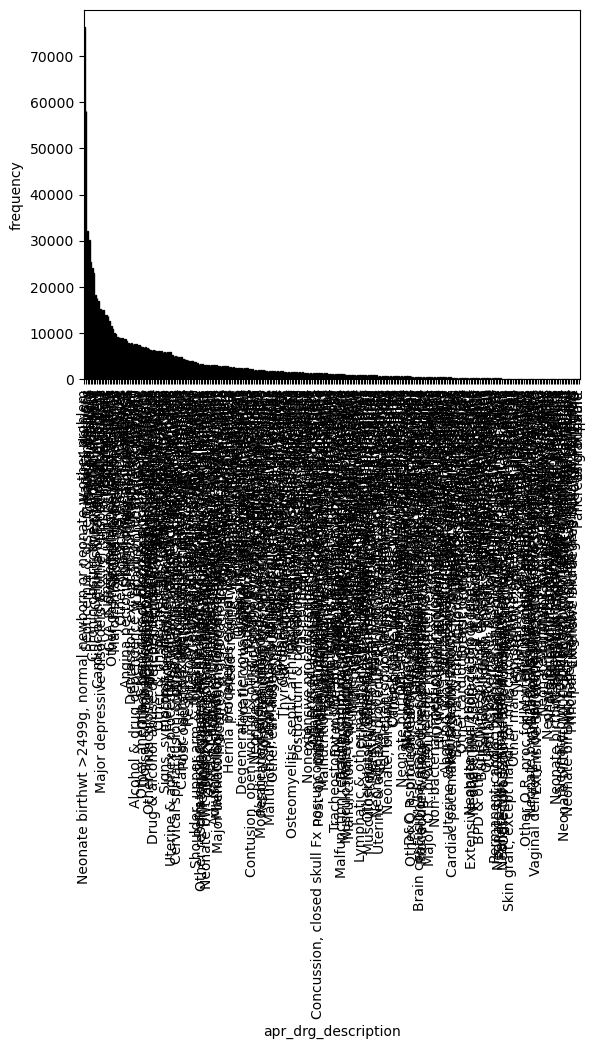

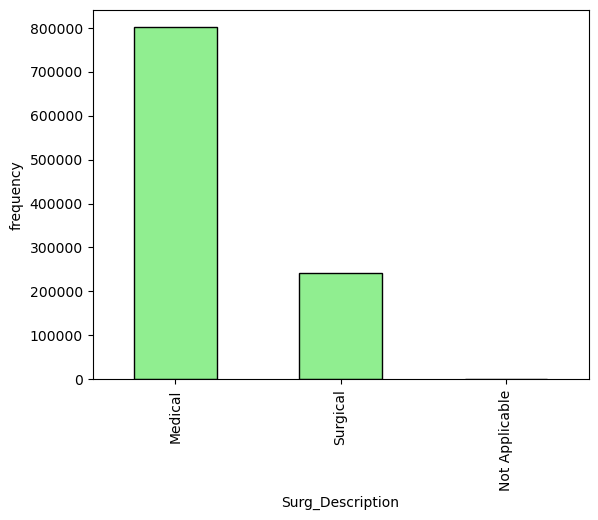

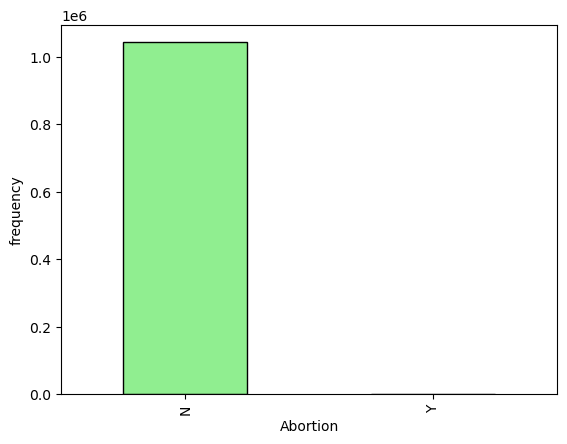

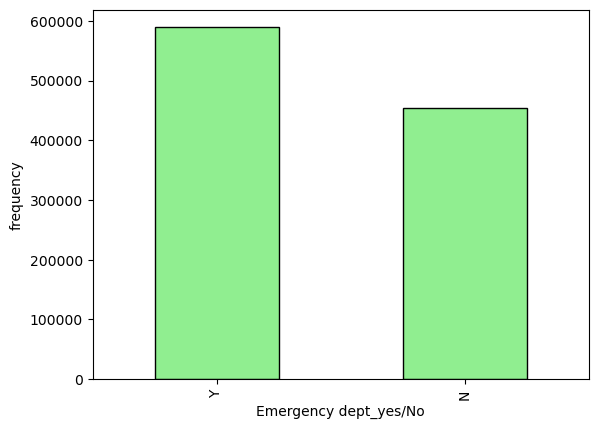

In [144]:
categorical = data.select_dtypes(include='object')
for col in categorical.columns:
    #bar_plot
    data[col].value_counts().plot( kind='bar', xlabel=col, ylabel='frequency', color=['lightGreen'],edgecolor="black",)
    plt.show()

#### Bi-variate Analysis of Numerical Variable

In [145]:
# numerical = data.select_dtypes(include='number')
# for col in numerical.columns:
#     if col != 'Result': # exclude target variable
#         # plot a histogram
#         plt.hist(data.loc[data['y'] == 'no', col], alpha=0.5, label='no', color='yellow')
#         plt.hist(data.loc[data['y'] == 'yes', col], alpha=0.5, label='yes', color='red')
#         plt.xlabel(col)
#         plt.ylabel('Frequency')
#         plt.legend()
#         plt.show()
#         # plot a box plot
#         sns.boxplot(x='y', y=col, data=data, color='lightblue')
#         plt.show()



#### Bi-variate Analysis of categorical Variable with Target Variable

In [146]:
# categorical = data.select_dtypes(include='object')
# for col in categorical.columns:
#     if col != 'Result': # exclude target variable
        
#         # create a crosstab
#         cross_tab = pd.crosstab(data[col], data['Result'])
#         # calculate proportion
#         cross_tab_prop = cross_tab.div(cross_tab.sum(axis=1), axis=0)
        
#         # plot a stacked bar chart with percentage of proportion
#         ax = cross_tab_prop.plot(kind='bar', stacked=True, xlabel=col, ylabel='Proportion', 
#                                  color=['pink', 'lightblue'], edgecolor="black")
#         ax.legend(['no', 'yes'])
#         for p in ax.patches:
#             width, height = p.get_width(), p.get_height()
#             x, y = p.get_xy() 
#             ax.annotate(f'{height:.0%}', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)
#         plt.show()

#### Correlation heatmap


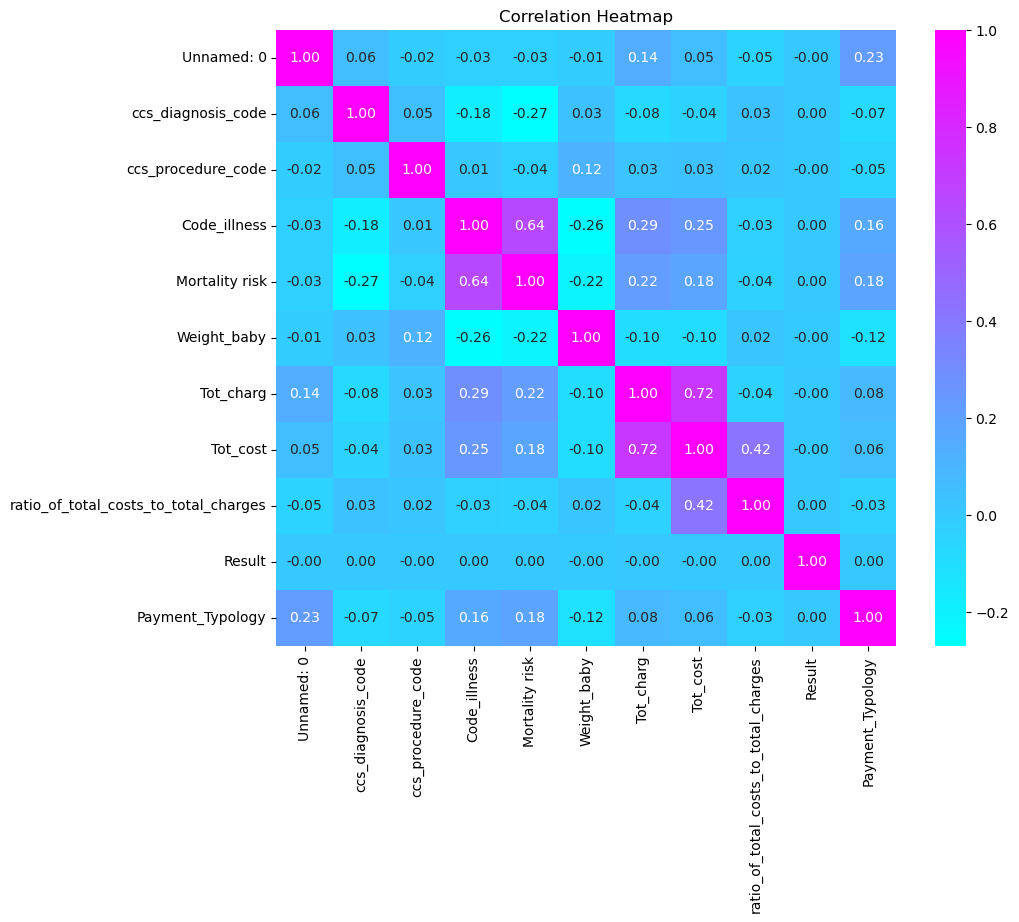

In [147]:
## CORRELATION HEATMAP TO FIND THE RELATION BETWEEN NUMERICAL VARIABLES
# Create a heatmap of the correlations with annotations
plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="cool", annot=True, fmt=".2f")

# Set plot title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()

### Data cleaning and preprocessing

In [88]:
data['Result']=data['Result'].replace({0:1,1:0})

# Get the count of 0s and 1s
count_0 = data['Result'].value_counts()[0]
count_1 = data['Result'].value_counts()[1]

print("Count of 0s: ", count_0)
print("Count of 1s: ", count_1)

Count of 0s:  629126
Count of 1s:  209734


In [89]:
print(data[data['Result']==0]['Area_Service'].mode())
print(data[data['Result']==1]['Area_Service'].mode())

0    Hudson Valley
Name: Area_Service, dtype: object
0    Hudson Valley
Name: Area_Service, dtype: object


In [90]:
# Filling the missing values with the mode since it's a categorical column
data['Area_Service'].fillna(value=0.0,inplace=True)

In [91]:
data['Area_Service'].isnull().sum()

0

In [92]:
print(data[data['Result']==0]['Hospital County'].mode())
print(data[data['Result']==1]['Hospital County'].mode())

0    Erie
Name: Hospital County, dtype: object
0    Erie
Name: Hospital County, dtype: object


In [93]:
# Filling the missing values with the mode since it's a categorical column
data['Hospital County'].fillna(value=0.0,inplace=True)

In [94]:
data['Hospital County'].isnull().sum()

0

In [95]:
print(data[data['Result']==0]['Mortality risk'].mode())
print(data[data['Result']==1]['Mortality risk'].mode())

0    1.0
Name: Mortality risk, dtype: float64
0    1.0
Name: Mortality risk, dtype: float64


In [96]:
# Filling the missing values with the mode since it's a categorical column
data['Mortality risk'].fillna(value=0.0,inplace=True)

In [97]:
data['Mortality risk'].isnull().sum()

0

In [98]:
data.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology', 'Result'],
      dtype='object')

In [99]:
data=data.drop('Hospital Id',axis=1)
data.columns

Index(['Area_Service', 'Hospital County', 'Age', 'Gender', 'Cultural_group',
       'ethnicity', 'Days_spend_hsptl', 'Admission_type', 'Home or self care,',
       'ccs_diagnosis_code', 'ccs_procedure_code', 'apr_drg_description',
       'Code_illness', 'Mortality risk', 'Surg_Description', 'Weight_baby',
       'Abortion', 'Emergency dept_yes/No', 'Tot_charg', 'Tot_cost',
       'ratio_of_total_costs_to_total_charges', 'Payment_Typology', 'Result'],
      dtype='object')

### Using IV for Feature Selection for Binary Logistic Regression

In [149]:
feature = data.drop(["Result"],axis=1)  #predictors
target = data["Result"] #target

In [150]:
def calc_woe_iv(feature, target):
   # Create a dataframe to store the WOE and IV values for each category/bin
    woe_iv_df = pd.DataFrame(columns=['Category/Bin', 'Event', 'Non-Event', 'WOE', 'IV'])
    # Check the data type of the feature
    if feature.dtypes == 'object':
        # Categorical feature
        feature.fillna('Missing', inplace=True)
        unique_categories = feature.unique()
        for category in unique_categories:
            event_count = len(target[(feature == category) & (target == 1)])
            non_event_count = len(target[(feature == category) & (target == 0)])
            total_event = len(target[target == 1])
            total_non_event = len(target[target == 0])
            event_rate = event_count / total_event
            non_event_rate = non_event_count / total_non_event
            woe = np.log(event_rate / non_event_rate)
            iv = (event_rate - non_event_rate) * woe
            woe_iv_df = woe_iv_df.append({'Category/Bin': category, 'Event': event_count, 'Non-Event': non_event_count, 'WOE': woe, 'IV': iv}, ignore_index=True)
    else:
        # Numerical feature
        bins = pd.qcut(feature, q=10, duplicates='drop')
        for category in bins.cat.categories:
            event_count = len(target[(bins == category) & (target == 1)])
            non_event_count = len(target[(bins == category) & (target == 0)])
            total_event = len(target[target == 1])
            total_non_event = len(target[target == 0])
            event_rate = event_count / total_event
            non_event_rate = non_event_count / total_non_event
            woe = np.log(event_rate / non_event_rate)
            iv = (event_rate - non_event_rate) * woe
            woe_iv_df = woe_iv_df.append({'Category/Bin': category, 'Event': event_count, 'Non-Event': non_event_count, 'WOE': woe, 'IV': iv}, ignore_index=True)
    # Calculate the total IV for the feature
    total_iv = woe_iv_df['IV'].sum()
    # Return the results
    return feature.name, woe_iv_df, total_iv, len(woe_iv_df)
def calculate_iv_df(data, target):
    iv_df = pd.DataFrame()  # define iv_df as an empty DataFrame
    iv_values = []
    for column in data.columns:
        feature = data[column]
        name, woe_iv, iv, n_bins = calc_woe_iv(feature, target)
        iv_values.append((name, iv, n_bins))
    iv_df = pd.DataFrame(iv_values, columns=['Feature', 'IV', 'Num_Bins'])
    iv_df.sort_values('IV', ascending=False, inplace=True)
    return iv_df

In [151]:
data1=calculate_iv_df(feature,data['Result'])
data1['IV'] = data1['IV'].apply(lambda x: '{:.5f}'.format(x))
data1

,Feature,IV,Num_Bins
12,apr_drg_description,0.00193,316
7,Days_spend_hsptl,0.00056,120
2,Hospital County,0.00034,52
9,"Home or self care,",0.00012,19
10,ccs_diagnosis_code,0.00008,10
21,ratio_of_total_costs_to_total_charges,0.00008,10
8,Admission_type,0.00007,6
20,Tot_cost,0.00007,10
3,Age,0.00006,5
0,Unnamed: 0,0.00005,10


In [152]:
# # Define categorical variables
# cat = ['Area_Service','Hospital County','Age','Gender','Cultural_group','ethnicity','Days_spend_hsptl','Admission_type','Home or self care,','ccs_diagnosis_code','ccs_procedure_code','apr_drg_description','Code_illness','Mortality risk','Surg_Description','Abortion','Emergency dept_yes/No','Payment_Typology']       

# # Define numerical variables
# num = ['Weight_baby','Tot_charg','Tot_cost','ratio_of_total_costs_to_total_charges']

# # Define target variables
# target = 'Result'

# # Convert categorical variables to type 'category'
# for col in cat:
#     data[col] = data[col].astype('category')

In [153]:
# woe_df = pd.DataFrame(columns=['Variable Name', 'Category Name', 'WOE'])
# for i in cat:
#     woe = calculate_woe(data,i,'Result')
#     for j in range(len(woe)):
#         woe_df.loc[len(woe_df)] = [i, list(woe.keys())[j], list(woe.values())[j]]

In [154]:
# woe_df = woe_df.sort_values(by=['Variable Name', 'WOE'], ascending=[True, False])
# woe_df.reset_index(inplace=True, drop=True)

In [155]:
# woe_dict = {}
# for col in cat:
#     #print(col)
#     temp_df = woe_df.loc[woe_df['Variable Name'] == str(col)]
#     woe_dict[f'woe_{col}'] = temp_df

In [156]:
# woe_df_Age = woe_df.loc[woe_df['Variable Name'] == "Age"]
# woe_df_Age.reset_index(inplace=True, drop=True)
# woe_df_Age

# Re-Grouping Similar WOE Values for all Categorical Variables

## Area Service

In [157]:
# data_re['Area_Service']=data_re['Area_Service'].replace({"New York City":'AS_G1',"Central NY":'AS_G1',"Western NY":'AS_G2',"Hudson Valley":'AS_G2',"Capital/Adirond":'AS_G3',"Finger Lakes":'AS_G3',"Southern Tier":'AS_G4'}) 

In [158]:
# data_re['Area_Service'].value_counts()

In [159]:
# calculate_woe(data_re, 'Area_Service', 'Result')

## Abortion

In [160]:
# data_re['Abortion']=data_re['Abortion'].replace({"N":'AB_G1',"Y":'AB_G2'}) 

In [161]:
# data_re['Abortion'].value_counts()

In [162]:
# calculate_woe(data_re, 'Abortion', 'Result')

## Admission Type

In [163]:
# data_re['Admission_type']=data_re['Admission_type'].replace({"Trauma":'AT_G1',"White":'AT_G1',"Emergency":'AT_G1',"Newborn":'AT_G1',"Elective":'AT_G2',"Urgent":'AT_G2',"Not Available":'AT_G3'}) 

In [164]:
# data_re['Admission_type'].value_counts()

In [165]:
# calculate_woe(data_re, 'Admission_type', 'Result')

## Cultural Group

In [166]:
# data_re['Cultural_group']=data_re['Cultural_group'].replace({"Black/African American":'CG_G1',"White":'CG_G1',"Other Race":'CG_G2',"Unknown":'CG_G3'}) 

In [167]:
# data_re['Cultural_group'].value_counts()

In [168]:
# calculate_woe(data_re, 'Cultural_group', 'Result')

## Surg Description

In [169]:
# data_re['Surg_Description']=data_re['Surg_Description'].replace({"Surgical":'SD_G1',"Medical":'SD_G1',"Not Applicable":'SD_G2'}) 

In [170]:
# data_re['Surg_Description'].value_counts()

In [171]:
# calculate_woe(data_re, 'Surg_Description', 'Result')

## Payment Typology

In [172]:
# data_re['Payment_Typology'] = data_re['Payment_Typology'].astype(str)

In [173]:
# data_re['Payment_Typology']=data_re['Payment_Typology'].replace({"1":'PT_G1',"2":'PT_G1',"3":'PT_G1',"4":'PT_G1',"5":'PT_G2'}) 

In [174]:
# data_re['Payment_Typology'].value_counts()

In [175]:
# calculate_woe(data_re, 'Payment_Typology', 'Result')

## Emergency Dept

In [176]:
# data_re['Emergency dept_yes/No']=data_re['Emergency dept_yes/No'].replace({"N":'ED_G1',"Y":'ED_G2'}) 

In [177]:
# data_re['Emergency dept_yes/No'].value_counts()

In [178]:
# calculate_woe(data_re, 'Emergency dept_yes/No', 'Result')

## Gender

In [179]:
# data_re['Gender']=data_re['Gender'].replace({"M":'GN_G1',"F":'GN_G1',"U":'GN_G2'}) 

In [180]:
# data_re['Gender'].value_counts()

In [181]:
# calculate_woe(data_re, 'Gender', 'Result')

## Ethnicity

In [182]:
# data_re['ethnicity ']=data_re['ethnicity'].replace({"Spanish/Hispanic":'ET_G1',"Unknown":'ET_G3',"Not Span/Hispanic":'ET_G2'}) 
# data_re['ethnicity ']

In [183]:
# # data_re['ethnicity'] = data_re['ethnicity'].apply(lambda x: 'ET_G1' if x=='Spanish/Hispanic'else x )
# # data_re['ethnicity'] = data_re['ethnicity'].apply(lambda x: 'ET_G2' if x=='Not Span/Hispanic'else x )
# data_re['ethnicity'] = data_re['ethnicity'].apply(lambda x: 'ET_G3' if x=='Unknown'else x )

In [184]:
# data_re['ethnicity'].value_counts()

In [185]:
# calculate_woe(data_re, 'ethnicity', 'Result')

## AGE

In [186]:
# data_re['Age']=data_re['Age'].replace({"0 to 17":'AG_G1',"18 to 29":'AG_G1',"30 to 49":'AG_G2',"50 to 69":'AG_G2',"70 or Older":'AG_G3'}) 
# # data_re['Age']

In [187]:
# data_re['Age'].value_counts()

In [188]:
# calculate_woe(data_re, 'Age', 'Result')

## Mortality Risk

In [189]:
# data_re['Mortality risk'] = data_re['Mortality risk'].astype(str)

In [190]:
# data_re['Mortality risk']=data_re['Mortality risk'].replace({"1.0":'MR_G1',"2.0":'MR_G2',"3.0":'MR_G3',"4.0":'MR_G4'}) 
# # data_re['Mortality risk']

In [191]:
# data_re['Mortality risk'].value_counts()

In [192]:
# calculate_woe(data_re, 'Mortality risk', 'Result')

## Code illness

In [193]:
# data_re['Code_illness'] = data_re['Code_illness'].astype(str)

In [194]:
# data_re['Code_illness ']=data_re['Code_illness'].replace({"0":'CI_G1',"1":'CI_G2',"2":'CI_G2',"3":'CI_G2',"4":'CI_G2'}) 

In [195]:
# data_re['Code_illness'] = data_re['Code_illness'].apply(lambda x: 'CI_G1' if x=='1'or  x=='2'or  x=='3' or  x=='4'else x )
# data_re['Code_illness'] = data_re['Code_illness'].apply(lambda x: 'CI_G2' if x=='0' else x )

In [196]:
# data_re['Code_illness'].value_counts()

In [197]:
# calculate_woe(data_re, 'Code_illness', 'Result')

## Home or self care

In [198]:
# data_re=pd.read_csv("WOEGrouped_Final.csv")

# data_re.drop(["Unnamed: 0.3","Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0"],axis=1)

In [199]:
# woe_df_HSC = woe_df.loc[woe_df['Variable Name'] == "Home or self care,"]
# woe_df_HSC.reset_index(inplace=True, drop=True)
# woe_df_HSC

In [200]:
# woe_df_HSC["Regrouping"] = np.nan
# woe_df_HSC

In [201]:
# criteria = {}

# x = np.round(np.arange(-0.18,0.22,0.02),4)
# y = np.round(np.arange(-0.20,0.22,0.02),4)

# count = 1
# for i,j in zip(x,y):
#     #if i>0 and j>0:
#     criteria[f'HSC_G{count}'] = (i,j)
# #     else:
# #         criteria[f'HC_G{count}'] = (i,j)
#     count = count + 1
# criteria

In [202]:
# columns = ['Groups', 'limit1', 'limit2']
# criteria_df=pd.DataFrame(index=range(len(criteria)),columns=columns)
# count=0
# for key,value in zip(criteria,criteria.values()):
#     #print(key,value[0],value[1])
#     criteria_df.iloc[count,0] = key
#     criteria_df.iloc[count,1] = value[0]
#     criteria_df.iloc[count,2] = value[1]
#     count = count+1
# criteria_df

In [203]:
# for i in range(len(woe_df_HSC)):
#     for j in range(len(criteria_df)):  
#             if (woe_df_HSC.iloc[i,2] < criteria_df.iloc[j,1] and woe_df_HSC.iloc[i,2]> criteria_df.iloc[j,2]):
#                 woe_df_HSC.iloc[i,3] = criteria_df.iloc[j,0]
# woe_df_HSC

In [204]:
# woe_df_HSC['Regrouping'].nunique()

In [205]:
# for i in range(len(data_re)):
#     for j in range(len(woe_df_HSC)):  
#             if data_re.iloc[i,8]== woe_df_HSC.iloc[j,1]:
                
#                 data_re.iloc[i,8]= woe_df_HSC.iloc[j,3]

In [206]:
# data_re["Home or self care,"].value_counts()

In [207]:
# data_re.to_csv('Grouped_Final.csv')

## apr-drg description

In [208]:
# data_re=pd.read_csv('Grouped_Final.csv')
# data_re=data_re.drop(["Unnamed: 0"],axis=1)
# data_re

In [209]:
# data["apr_drg_description"].nunique()

In [210]:
# woe_df_ADD = woe_df.loc[woe_df['Variable Name'] == "apr_drg_description"]
# woe_df_ADD.reset_index(inplace=True, drop=True)
# woe_df_ADD

In [211]:
# woe_df_ADD["Regrouping"] = np.nan
# woe_df_ADD

In [212]:
# criteria = {}

# x = np.round(np.arange(-0.78,0.90,0.02),2)
# y = np.round(np.arange(-0.80,0.90,0.02),2)

# count = 1
# for i,j in zip(x,y):
#     #if i>0 and j>0:
#     criteria[f'ADD_G{count}'] = (i,j)
# #     else:
# #         criteria[f'HC_G{count}'] = (i,j)
#     count = count + 1
# criteria


In [213]:
# columns = ['Groups', 'limit1', 'limit2']
# criteria_df=pd.DataFrame(index=range(len(criteria)),columns=columns)
# count=0
# for key,value in zip(criteria,criteria.values()):
#     #print(key,value[0],value[1])
#     criteria_df.iloc[count,0] = key
#     criteria_df.iloc[count,1] = value[0]
#     criteria_df.iloc[count,2] = value[1]
#     count = count+1
# criteria_df

In [214]:
# for i in range(len(woe_df_ADD)):
#     for j in range(len(criteria_df)):  
#             if (woe_df_ADD.iloc[i,2] < criteria_df.iloc[j,1] and woe_df_ADD.iloc[i,2]> criteria_df.iloc[j,2]):
#                 woe_df_ADD.iloc[i,3] = criteria_df.iloc[j,0]
# woe_df_ADD

In [215]:
# data_re["apr_drg_description"].nunique()

## MODEL FITTING

### Taking out Numerical Variables from dataset

In [55]:
numerical_Variables = data.select_dtypes(include=['int', 'float'])#exclude categorical variables
numerical_Variables=numerical_Variables.drop(["ccs_diagnosis_code","ccs_procedure_code"],axis=1)
numerical_Variables.columns

Index(['Code_illness', 'Mortality risk', 'Weight_baby', 'Tot_charg',
       'Tot_cost', 'ratio_of_total_costs_to_total_charges', 'Payment_Typology',
       'Result'],
      dtype='object')

In [56]:

# Extract the categorical variable to encode
cat_var = data['apr_drg_description']

# Calculate the frequency of each category
freq = cat_var.value_counts(normalize=True)

# Create a dictionary to map each category to its frequency
freq_dict = freq.to_dict()

# Replace the original categorical variable with its frequency-encoded version
data['apr_drg_description'] = cat_var.map(freq_dict)


### One-Hot Encoding of Categorical Variables

In [57]:
OHE_Categorical_Variables = pd.get_dummies(data[['Area_Service', 'Hospital County','Age', 'Gender','Cultural_group', 'ethnicity', 'Admission_type','Home or self care,','Surg_Description', 'Abortion', 'Emergency dept_yes/No']])
OHE_Categorical_Variables 

,Area_Service_0.0,Area_Service_Capital/Adirond,Area_Service_Central NY,Area_Service_Finger Lakes,Area_Service_Hudson Valley,Area_Service_New York City,Area_Service_Southern Tier,Area_Service_Western NY,Hospital County_0.0,Hospital County_Albany,...,"Home or self care,_Psychiatric Hospital or Unit of Hosp","Home or self care,_Short-term Hospital","Home or self care,_Skilled Nursing Home",Surg_Description_Medical,Surg_Description_Not Applicable,Surg_Description_Surgical,Abortion_N,Abortion_Y,Emergency dept_yes/No_N,Emergency dept_yes/No_Y
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838855,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
838856,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
838857,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
838858,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [58]:
#combing the one hot encoded categorical variable to rest of the predictors
join= [numerical_Variables,OHE_Categorical_Variables] 
Data = pd.concat(join,axis=1,join='inner')  
Data.shape

(838860, 115)

### Assigning X as predictors and y as target

In [37]:
X_train = Data.drop(["Result"],axis=1)  #predictors
y_train = Data["Result"] #target

### Train-Test Split

In [225]:
from sklearn.model_selection import train_test_split

# Split dataset into train and test sets (80/20 split)
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split train set into train and validation sets (75/25 split)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_test, y_train_test, test_size=0.25, random_state=42, stratify=y_train_test)


### MODEL 1: Logistic Regression- using all variables on class imbalanced data

In [117]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train,y_train)

#predictions on validation data
pred_valid = lr.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm1 = pd.DataFrame({'Logistic_Model_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
lm1

              precision    recall  f1-score   support

           0       0.75      1.00      0.86    156684
           1       0.25      0.00      0.00     52068

    accuracy                           0.75    208752
   macro avg       0.50      0.50      0.43    208752
weighted avg       0.63      0.75      0.64    208752



,Logistic_Model_1
Accuracy,0.750546
F1_score,0.000115
Recall,0.000058
AUROC,0.500000


### MODEL 2: Decision Tree - using all variables on class imbalanced data

In [118]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

#predictions on validation data
pred_valid = dt.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

dt = pd.DataFrame({'DecisionTree': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
dt

              precision    recall  f1-score   support

           0       0.75      1.00      0.86    156684
           1       0.27      0.00      0.00     52068

    accuracy                           0.75    208752
   macro avg       0.51      0.50      0.43    208752
weighted avg       0.63      0.75      0.64    208752



,DecisionTree
Accuracy,0.750527
F1_score,0.000230
Recall,0.000115
AUROC,0.500007


### MODEL 3: Random Forest - using all variables on class imbalanced data

In [119]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train) 
pred = rf.predict(X_valid)

#predictions on validation data
pred_valid = rf.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

rf2 = pd.DataFrame({'Random_Forest_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
rf2

,Random_Forest_1
Accuracy,0.736314
F1_score,0.049063
Recall,0.027272
AUROC,0.499605


### MODEL 4: Ada-Boost - using all variables on class imbalanced data

In [ ]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train) 
pred = ada_boost.predict(X_valid)

#predictions on validation data
pred_valid = ada_boost.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

adb2 = pd.DataFrame({'Adaboost_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
adb2

### Class-Balancing  using SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [23]:
y_train.value_counts() #Class imbalanced data

0    469312
1    156944
Name: Result, dtype: int64

In [24]:
y_train1 = pd.DataFrame(y_train_res)
X_train1 = pd.DataFrame(X_train_res)

In [25]:
y_train.value_counts() #Oversampling using smote balanced the class

0    469312
1    156944
Name: Result, dtype: int64

### MODEL 5: Logistic Regression- using selected features on class balanced data


In [125]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train1,y_train1)

#predictions on validation data
pred_valid = lr.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm2 = pd.DataFrame({'Logistic_Model_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
lm2

              precision    recall  f1-score   support

           0       0.75      0.68      0.71    156684
           1       0.25      0.32      0.28     52068

    accuracy                           0.59    208752
   macro avg       0.50      0.50      0.50    208752
weighted avg       0.63      0.59      0.60    208752



,Logistic_Model_2
Accuracy,0.587774
F1_score,0.281832
Recall,0.324287
AUROC,0.499811


### MODEL 6: Decision Tree - using all features on class balanced data

In [126]:
#Fitting Decision tree Model
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train1,y_train1)

#predictions on validation data
pred_valid = dt.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

dt = pd.DataFrame({'DecisionTree2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
dt

              precision    recall  f1-score   support

           0       0.75      0.96      0.84    156684
           1       0.25      0.04      0.07     52068

    accuracy                           0.73    208752
   macro avg       0.50      0.50      0.46    208752
weighted avg       0.63      0.73      0.65    208752



,DecisionTree2
Accuracy,0.730599
F1_score,0.071643
Recall,0.041676
AUROC,0.500606


### MODEL 7: Ada-boost -  using all variables on class balanced data

In [127]:
#Fitting Adaboost Model
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train1, y_train1) 
pred = ada_boost.predict(X_valid)

#predictions on validation data
pred_valid = ada_boost.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

adb2 = pd.DataFrame({'Adaboost_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
adb2

,Adaboost_2
Accuracy,0.737574
F1_score,0.046573
Recall,0.025697
AUROC,0.499918


### MODEL 8: Random Forest - using all variables on class balanced data

In [128]:
#Fitting Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train1, y_train1) 
pred = rf.predict(X_valid)

#predictions on validation data
pred_valid = rf.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

rf2 = pd.DataFrame({'Random_Forest_2': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

#print(classification_report(y_valid,pred_valid))
rf2

,Random_Forest_2
Accuracy,0.719845
F1_score,0.092119
Recall,0.056983
AUROC,0.498552


In [1]:
# # Create LightGBM datasets for train/validation/test
# train_data = lgb.Dataset(X_train1, label=y_train1)
# valid_data = lgb.Dataset(X_valid, label=y_valid)
# test_data = lgb.Dataset(X_test, label=y_test)

# # Define model parameters
# params = {
#     'objective': 'binary',
#     'metric': 'binary_logloss',
#     'boosting_type': 'gbdt',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9
# }

# # Train the model
# model = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, valid_data], early_stopping_rounds=50)

# # Make predictions on the test set
# y_pred_prob = model.predict(X_test)
# y_pred = (y_pred_prob > 0.5).astype(int)

# # Compute F1 score and AUC-ROC
# f1 = f1_score(y_test, y_pred)
# auc_roc = roc_auc_score(y_test, y_pred_prob)

# # Store results in a Pandas DataFrame
# results_df = pd.DataFrame({
#     'F1 score': [f1],
#     'AUC-ROC': [auc_roc]
# })
# results_df

In [ ]:
# Define the range of values to test for the max_depth hyperparameter
max_depth_values = range(1, 11)

# Initialize variables to store the best accuracy and the corresponding max_depth value
best_accuracy = 0
best_max_depth = 0

# Initialize lists to store the max_depth values and corresponding accuracies
max_depths = []
accuracies = []

# Loop over each value of max_depth
for max_depth in max_depth_values:
    # Define the decision tree classifier with the current max_depth
    dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Train the decision tree classifier
    dtc.fit(X_train1, y_train1)
    
    # Evaluate the decision tree classifier on the valid set
    accuracy = dtc.score(X_valid, y_valid)
    print(f"Accuracy for max_depth={max_depth}: {accuracy}")
    
    # Update the best accuracy and corresponding max_depth value if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth
    
    # Append the max_depth and corresponding accuracy to the lists
    max_depths.append(max_depth)
    accuracies.append(accuracy)

# Print the best max_depth value and corresponding accuracy
print(f"Best max_depth: {best_max_depth}")
print(f"Accuracy with best max_depth: {best_accuracy}")

# Plot the accuracies versus the max_depths
plt.plot(max_depths, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy vs. max_depth')
plt.show()


In [ ]:
# Define the range of values to test for the max_depth hyperparameter
max_depth_values = range(1, 20)

# Initialize variables to store the best accuracy and the corresponding max_depth value
best_accuracy = 0
best_max_depth = 0

# Initialize lists to store the max_depth values and corresponding accuracies
max_depths = []
accuracies = []

# Loop over each value of max_depth
for max_depth in max_depth_values:
    # Define the decision tree classifier with the current max_depth
    dtc = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Train the decision tree classifier
    dtc.fit(X_train, y_train)
    
    # Evaluate the decision tree classifier on the valid set
    accuracy = dtc.score(X_valid, y_valid)
    print(f"Accuracy for max_depth={max_depth}: {accuracy}")
    
    # Update the best accuracy and corresponding max_depth value if the current accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth
    
    # Append the max_depth and corresponding accuracy to the lists
    max_depths.append(max_depth)
    accuracies.append(accuracy)

# Print the best max_depth value and corresponding accuracy
print(f"Best max_depth: {best_max_depth}")
print(f"Accuracy with best max_depth: {best_accuracy}")

# Plot the accuracies versus the max_depths
plt.plot(max_depths, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Accuracy vs. max_depth')
plt.show()


In [27]:
#pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
# fitting data in LazyRegressor because
# here we are solving Regression use case.
clf = LazyClassifier(verbose=0,
                     ignore_warnings=False,
                     custom_metric=None)
  
# fitting data in LazyClassifier
models, predictions = clf.fit(X_train, X_test,
                              y_train, y_test)
# lets check which model did better
# on Insurance dataset
print(models)

 17%|█████████████▍                                                                | 5/29 [1:02:14<5:32:53, 832.25s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 28%|█████████████████████▌                                                        | 8/29 [1:04:04<1:35:08, 271.82s/it]

 ### Gradient boosting

In [145]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)

pred_train = gradient_boosting.predict(X_train)

accuracy_train = accuracy_score(y_train, pred_train)
f1_train = f1_score(y_train, pred_train)
precision_train = precision_score(y_train, pred_train)
recall_train = recall_score(y_train, pred_train)
roc_train = roc_auc_score(y_train, pred_train)
print('Train Accuracy:', accuracy_train)
print('Train F1 Score:', f1_train)
print('Train Precision:', precision_train)
print('Train Recall:', recall_train)
print('Train ROC:', roc_train)

pred_valid = gradient_boosting.predict(X_valid)

accuracy_valid = accuracy_score(y_valid, pred_valid)
f1_valid = f1_score(y_valid, pred_valid)
precision_valid = precision_score(y_valid, pred_valid)
recall_valid = recall_score(y_valid, pred_valid)
roc_valid = roc_auc_score(y_valid, pred_valid)
print('\nValid Accuracy:', accuracy_valid)
print('Valid F1 Score:', f1_valid)
print('Valid Precision:', precision_valid)
print('Valid Recall:', recall_valid)
print('Valid ROC:', roc_valid)

Train Accuracy: 0.7494043969239417
Train F1 Score: 0.00010194134549833389
Train Precision: 0.8888888888888888
Train Recall: 5.0973595677439085e-05
Train ROC: 0.5000244214085029

Valid Accuracy: 0.749372461102169
Valid F1 Score: 0.0
Valid Precision: 0.0
Valid Recall: 0.0
Valid ROC: 0.4999840192280648


In [196]:
# from sklearn.feature_selection import RFE


# # Initialize Random Forest Classifier
# rfc = RandomForestClassifier()

# # Perform recursive feature elimination
# rfe = RFE(estimator=rfc, n_features_to_select=10)
# rfe.fit(X_train, y_train)

# # Print the selected features
# print(X.columns[rfe.support_])


In [ ]:
from sklearn.feature_selection import RFE

# Initialize Logistic Regression
logreg = LogisticRegression()

# Perform recursive feature elimination
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe.fit(X, y)

# Print the selected features
print(X.columns[rfe.support_])

### Feature selection using random forest

In [108]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train2, y_train2)
sel.get_support()
selected_feat= X_train2.columns[(sel.get_support())]
len(selected_feat)
print(selected_feat)

Index(['Unnamed: 0', 'Code_illness', 'Mortality risk', 'Weight_baby',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology', 'Gender_F', 'Gender_M'],
      dtype='object')


### RANDOM FOREST For Class Imbalanced Data and Selected Features

In [97]:
X_train=X_train[['Code_illness', 'Mortality risk', 'Weight_baby',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology']]
X_test=X_test[['Code_illness', 'Mortality risk', 'Weight_baby',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology']]

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_test = rf.predict(X_test)   #predictions on transformed validation data

F1_score = f1_score((y_test),(pred_test))
accuracy = accuracy_score((y_test),(pred_test))
auc_roc=roc_auc_score((y_test),(pred_test))
Metric=pd.DataFrame({'Random Forest For Class Imbalanced Data and Selected Features': [F1_score,accuracy,auc_roc]},
                    index=['F1_score','Accuracy','AUC-ROC'])
print(classification_report((y_test),(pred_test)))
Metric

              precision    recall  f1-score   support

           0       0.25      0.10      0.15     52315
           1       0.75      0.90      0.82    156438

    accuracy                           0.70    208753
   macro avg       0.50      0.50      0.48    208753
weighted avg       0.62      0.70      0.65    208753



,Random Forest For Class Imbalanced Data and Selected Features
F1_score,0.817037
Accuracy,0.698601
AUC-ROC,0.500157


In [98]:
from sklearn.model_selection import cross_val_score
from imblearn.metrics import make_index_balanced_accuracy, geometric_mean_score

X_train = X_train[['Code_illness', 'Mortality risk', 'Weight_baby', 'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges', 'Payment_Typology']]
X_test = X_test[['Code_illness', 'Mortality risk', 'Weight_baby', 'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges', 'Payment_Typology']]

rf = RandomForestClassifier()
f1_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=make_index_balanced_accuracy(alpha=2), n_jobs=-1)
f2_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring=geometric_mean_score, n_jobs=-1)

print("Average F1-score: {:.3f}".format(np.mean(f1_scores)))
print("Average F2-score: {:.3f}".format(np.mean(f2_scores)))


Average F1-score: nan
Average F2-score: nan


### Feature selection using ada boost

In [105]:

# Initialize AdaBoost classifier
clf = AdaBoostClassifier()

# Train the classifier
clf.fit(X_train2, y_train2)

# Extract feature importance scores from the classifier
feature_importance = clf.feature_importances_

# Get the names of the features
feature_names = X_train2.columns.values.tolist()

# Get the indices of the most important features
important_indices = feature_importance.argsort()[::-1][:3] # Change the number 3 to the number of features you want to select

# Get the names of the most important features
important_features = [feature_names[i] for i in important_indices]

# Print the names of the most important features
print("Most important features:", important_features)

Most important features: ['Tot_cost', 'Unnamed: 0', 'Tot_charg']


In [107]:
X_train3=X_train2[['Tot_cost','Tot_charg']]
X_test=X_test[['Tot_cost','Tot_charg']]


# Initialize AdaBoost classifier
clf = AdaBoostClassifier()

# Train the classifier
clf.fit(X_train3, y_train2)
pred_test = clf.predict(X_test)   #predictions on transformed validation data

F1_score = f1_score((y_test),(pred_test))
accuracy = accuracy_score((y_test),(pred_test))
auc_roc=roc_auc_score((y_test),(pred_test))
Metric=pd.DataFrame({'Ada boost For Class Imbalanced Data and Selected Features': [F1_score,accuracy,auc_roc]},
                    index=['F1_score','Accuracy','AUC-ROC'])
print(classification_report((y_test),(pred_test)))
Metric

              precision    recall  f1-score   support

           0       0.25      0.45      0.32     52315
           1       0.75      0.55      0.64    156438

    accuracy                           0.53    208753
   macro avg       0.50      0.50      0.48    208753
weighted avg       0.63      0.53      0.56    208753



,Ada boost For Class Imbalanced Data and Selected Features
F1_score,0.637420
Accuracy,0.527513
AUC-ROC,0.500949


### Class-Balancing  using Random oversampling

In [226]:
from imblearn.over_sampling import RandomOverSampler

# X is your feature matrix and y is your target variable
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [227]:
y_train2 = pd.DataFrame(y_resampled)
X_train2 = pd.DataFrame(X_resampled)

In [228]:
y_train2.value_counts()

Result
0         469313
1         469313
dtype: int64

In [229]:
y_valid.value_counts()

1    156437
0     52315
Name: Result, dtype: int64

In [231]:
X_valid

,Unnamed: 0,Code_illness,Mortality risk,Weight_baby,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,Area_Service_0.0,Area_Service_Capital/Adirond,...,"Home or self care,_Psychiatric Hospital or Unit of Hosp","Home or self care,_Short-term Hospital","Home or self care,_Skilled Nursing Home",Surg_Description_Medical,Surg_Description_Not Applicable,Surg_Description_Surgical,Abortion_N,Abortion_Y,Emergency dept_yes/No_N,Emergency dept_yes/No_Y
817669,817669,2,3.0,0,41120.71,7410.38,0.180211,2,0,0,...,0,0,0,0,0,1,1,0,0,1
478175,478175,2,1.0,0,8933.40,4073.08,0.455938,2,0,0,...,0,0,0,1,0,0,1,0,1,0
533492,533492,1,1.0,0,15421.22,9829.98,0.637432,1,0,0,...,0,0,0,0,0,1,1,0,1,0
71490,71490,3,3.0,0,3966.02,1780.38,0.448909,1,0,0,...,0,0,0,1,0,0,1,0,1,0
823998,823998,1,1.0,0,7913.13,2709.54,0.342411,1,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910802,910802,2,1.0,0,2188.80,681.63,0.311417,3,0,0,...,0,0,0,1,0,0,1,0,1,0
420188,420188,4,4.0,0,130181.23,56332.88,0.432727,1,0,0,...,0,0,0,1,0,0,1,0,0,1
118746,118746,3,2.0,0,16460.64,5108.41,0.310341,2,0,0,...,0,0,0,1,0,0,1,0,0,1
270832,270832,2,1.0,0,9651.45,5676.38,0.588137,2,0,0,...,0,0,0,1,0,0,1,0,0,1


### 1. Logistic Regression on Random Oversampled data

In [101]:
#Fitting Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train2,y_train2)

#predictions on validation data
pred_valid = lr.predict(X_valid)   
pred_valid

#Metrics
Accuracy = accuracy_score(y_valid, pred_valid)
F1_score = f1_score(y_valid, pred_valid)
Recall_score = recall_score(y_valid, pred_valid)
AUROC = roc_auc_score(y_valid, pred_valid)

lm1 = pd.DataFrame({'Logistic_Model_1': [Accuracy,F1_score,Recall_score,AUROC]}, 
                                index=['Accuracy','F1_score','Recall','AUROC'])

print(classification_report(y_valid,pred_valid))
lm1

              precision    recall  f1-score   support

           0       0.25      0.35      0.29     52315
           1       0.75      0.65      0.70    156437

    accuracy                           0.58    208752
   macro avg       0.50      0.50      0.50    208752
weighted avg       0.63      0.58      0.60    208752



,Logistic_Model_1
Accuracy,0.577432
F1_score,0.698678
Recall,0.653739
AUROC,0.501494


### 10 Techniques to Solve Imbalanced Classes in Machine Learning 
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

### 2. Decision tree - increase and decrease the depth of DT and find f1 score, F2 score and f0.5 score

F1 score doesn't consistently decrease with the increase in depth


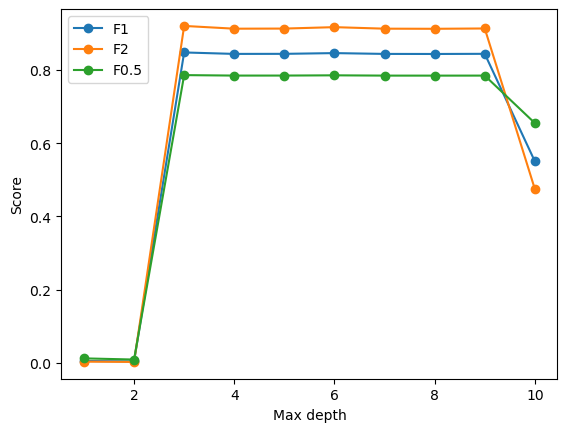

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, fbeta_score
import matplotlib.pyplot as plt
# Define a list of max depths to try
max_depths = [1, 2, 3, 4, 5, 6,7,8,9,10]

# Train a decision tree for each depth and calculate the F1, F2, and F0.5 scores on a held-out validation set
f1_scores = []
f2_scores = []
f05_scores = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train2, y_train2)
    y_pred = clf.predict(X_valid)
    f1_scores.append(f1_score(y_valid, y_pred))
    f2_scores.append(fbeta_score(y_valid, y_pred, beta=2))
    f05_scores.append(fbeta_score(y_valid, y_pred, beta=0.5))

# Plot the F1, F2, and F0.5 scores for each depth
plt.plot(max_depths, f1_scores, '-o', label='F1')
plt.plot(max_depths, f2_scores, '-o', label='F2')
plt.plot(max_depths, f05_scores, '-o', label='F0.5')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend()

# Check if F1 score generally decreases with depth
if all(f1_scores[i] >= f1_scores[i+1] for i in range(len(f1_scores)-1)):
    print("F1 score generally decreases with the increase in depth")
else:
    print("F1 score doesn't consistently decrease with the increase in depth")


In [101]:
# Find the best depth based on F1 score
best_depth = max_depths[f1_scores.index(max(f1_scores))]
print("Best depth based on F1 score:", best_depth)

Best depth based on F1 score: 3


# ---------------------------------------------------------------------------------------------------------------

### 3. Pruned Decision tree at max depth 3

In [102]:
# Train a decision tree with maximum depth of 3 and prune it
clf = DecisionTreeClassifier(max_depth=3, ccp_alpha=0.01)
clf.fit(X_train2, y_train2)

# Predict on the validation set
y_pred = clf.predict(X_valid)

# Calculate F1, F2, and F0.5 scores
f1 = f1_score(y_valid, y_pred)
f2 = fbeta_score(y_valid, y_pred, beta=2)
f05 = fbeta_score(y_valid, y_pred, beta=0.5)

# Print the scores
print("F1 score:", f1)
print("F2 score:", f2)
print("F0.5 score:", f05)


F1 score: 0.8567454112801864
F2 score: 0.9373097663271419
F0.5 score: 0.788934333220703


# ---------------------------------------------------------------------------------------------------------------

### 4. Random forest classifier on random oversampled data

In [103]:
# Initialize a Random Forest Classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
rfc.fit(X_train2, y_train2)

# Predict the probabilities of the positive class on the validation data
y_pred_proba = rfc.predict_proba(X_valid)[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_valid, y_pred_proba)

# Predict the labels on the validation data
y_pred = rfc.predict(X_valid)

# Calculate the f1 score
f1 = f1_score(y_valid, y_pred)

# Calculate the f2 score
f2 = fbeta_score(y_valid, y_pred, beta=2)

# Calculate the f0.5 score
f05 = fbeta_score(y_valid, y_pred, beta=0.5)

# Print the results
print("AUC-ROC score:", auc_roc)
print("f1 score:", f1)
print("f2 score:", f2)
print("f0.5 score:", f05)


AUC-ROC score: 0.49619461428371375
f1 score: 0.8071536129045565
f2 score: 0.8467979284350484
f0.5 score: 0.7710553191585192


In [101]:
# from sklearn.model_selection import cross_val_score

# # Initialize a Random Forest Classifier with 100 trees
# rfc = RandomForestClassifier(n_estimators=100)

# # Concatenate the training data and resampled data
# X_resampled = pd.concat([X_train, X_train2])
# y_resampled = pd.concat([y_train, y_train2])

# # Perform 5-fold cross-validation
# scores = cross_val_score(rfc, X_resampled, y_resampled, cv=5, scoring='f1_macro')

# # Print the average score and standard deviation
# print("Average f1_macro score:", scores.mean())
# print("Standard deviation:", scores.std())


# ---------------------------------------------------------------------------------------------------------------

### 5. Hyperparameter tuning of ada boost classifier

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 1.0],
# }

# # Create the AdaBoost Classifier
# clf = AdaBoostClassifier()

# # Create the GridSearchCV object with 'f1' as the scoring metric
# grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='f1')

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train2, y_train2)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Create the AdaBoost Classifier with the best hyperparameters
# best_clf = AdaBoostClassifier(**best_params)

# # Fit the best classifier to the training data
# best_clf.fit(X_train2, y_train2)

# # Predict the class labels for the test data
# y_pred = best_clf.predict(X_test)

# # Calculate the F1 score on the test data
# f1 = f1_score(y_test, y_pred)

# # Print the best hyperparameters and the F1 score
# print("Best hyperparameters:", best_params)
# print("F1 score:", f1)


In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the AdaBoost Classifier
clf = AdaBoostClassifier()

# Create the RandomizedSearchCV object with 'f1' as the scoring metric
rand_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=5, scoring='f1', n_iter=10, random_state=42)

# Fit the RandomizedSearchCV object to the training data
rand_search.fit(X_train2, y_train2)

# Get the best hyperparameters
best_params = rand_search.best_params_

# Create the AdaBoost Classifier with the best hyperparameters
best_clf = AdaBoostClassifier(**best_params)

# Fit the best classifier to the training data
best_clf.fit(X_train2, y_train2)

# Predict the class labels for the test data
y_pred = best_clf.predict(X_valid)

# Calculate the F1 score on the test data
f1 = f1_score(y_valid, y_pred)

# Print the best hyperparameters and the F1 score
print("Best hyperparameters:", best_params)
print("F1 score:", f1)


Best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 51}
F1 score: 0.6879314695806384


In [232]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, fbeta_score, roc_auc_score, classification_report

# Initialize the AdaBoost classifier with the best hyperparameters
ada = AdaBoostClassifier(n_estimators=51, learning_rate=0.01)

# Fit the classifier to the training data
ada.fit(X_train2, y_train2)

# Predict the labels for the test data
y_pred = ada.predict(X_valid)

# Calculate the evaluation metrics
f1 = f1_score(y_valid, y_pred)
f2 = fbeta_score(y_valid, y_pred, beta=2)
f05 = fbeta_score(y_valid, y_pred, beta=0.5)
auc_roc = roc_auc_score(y_valid, ada.predict_proba(X_valid)[:, 1])
class_report = classification_report(y_valid, y_pred)

# Print the results
print("F1 score:", f1)
print("F2 score:", f2)
print("F0.5 score:", f05)
print("AUC-ROC score:", auc_roc)
print("Classification report:\n", class_report)


F1 score: 0.8206363899334684
F2 score: 0.8702152486285462
F0.5 score: 0.7764023431042957
AUC-ROC score: 0.49910159921638
Classification report:
               precision    recall  f1-score   support

           0       0.25      0.09      0.14     52315
           1       0.75      0.91      0.82    156437

    accuracy                           0.70    208752
   macro avg       0.50      0.50      0.48    208752
weighted avg       0.62      0.70      0.65    208752



# ---------------------------------------------------------------------------------------------------------------

### 6. Hyperparameter tuning of Random forest classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter grid
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

# Create the RandomForest Classifier
clf = RandomForestClassifier()

# Create the RandomizedSearchCV object with 'f1' as the scoring metric
rand_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=5, scoring='f1', n_iter=10, random_state=42)

# Fit the RandomizedSearchCV object to the training data
rand_search.fit(X_train2, y_train2)

# Get the best hyperparameters
best_params = rand_search.best_params_

# Create the RandomForest Classifier with the best hyperparameters
best_clf = RandomForestClassifier(**best_params)

# Fit the best classifier to the training data
best_clf.fit(X_train2, y_train2)

# Predict the class labels for the validation data
y_pred = best_clf.predict(X_valid)

# Calculate the F1 score on the validation data
f1 = f1_score(y_valid, y_pred)

# Print the best hyperparameters and the F1 score
print("Best hyperparameters:", best_params)
print("F1 score:", f1)


Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 160}
F1 score: 0.8041118615949757


In [236]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(n_estimators=160, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, bootstrap=False)

# Fit the classifier to the training data
rf.fit(X_train2, y_train2)

# Predict the labels for the test data
y_pred = rf.predict(X_valid)

# Evaluate the F1, F2, and F0.5 scores of the classifier
f1 = f1_score(y_valid, y_pred)
f2 = fbeta_score(y_valid, y_pred, beta=2)
f05 = fbeta_score(y_valid, y_pred, beta=0.5)

print("F1 score:", f1)
print("F2 score:", f2)
print("F0.5 score:", f05)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_valid, y_pred)

# Print AUC-ROC score
print("AUC-ROC score: {:.4f}".format(auc_roc))

# Print classification report
print(classification_report(y_valid, y_pred))


F1 score: 0.8039717370575031
F2 score: 0.8410502145608967
F0.5 score: 0.770024494204324
AUC-ROC score: 0.4990
              precision    recall  f1-score   support

           0       0.25      0.13      0.17     52315
           1       0.75      0.87      0.80    156437

    accuracy                           0.68    208752
   macro avg       0.50      0.50      0.49    208752
weighted avg       0.62      0.68      0.65    208752



In [252]:
from sklearn.model_selection import KFold

# Initialize the Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(n_estimators=160, max_depth=None, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, bootstrap=False)

# Set the number of folds
n_folds = 3

# Set the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation scores
f1_scores = []
f2_scores = []
f05_scores = []
auc_roc_scores = []

# Loop through the folds
for train_idx, valid_idx in kf.split(X_train2, y_train2):
    # Split the data into training and validation sets for this fold
    X_train3, X_valid = X_train2.iloc[X_train2.index[train_idx]], X_train2.iloc[X_train2.index[valid_idx]]
    y_train3, y_valid = y_train2.iloc[y_train2.index[train_idx]], y_train2.iloc[y_train2.index[valid_idx]]

    # Fit the classifier to the training data for this fold
    rf.fit(X_train3, y_train3)

    # Predict the labels for the validation data for this fold
    y_pred = rf.predict(X_valid)

    # Evaluate the F1, F2, and F0.5 scores for this fold
    f1 = f1_score(y_valid, y_pred)
    f2 = fbeta_score(y_valid, y_pred, beta=2)
    f05 = fbeta_score(y_valid, y_pred, beta=0.5)
    
    # Calculate AUC-ROC score for this fold
    auc_roc = roc_auc_score(y_valid, y_pred)

    # Add the scores for this fold to the lists
    f1_scores.append(f1)
    f2_scores.append(f2)
    f05_scores.append(f05)
    auc_roc_scores.append(auc_roc)

# Calculate the average scores over all folds
avg_f1 = sum(f1_scores) / n_folds
avg_f2 = sum(f2_scores) / n_folds
avg_f05 = sum(f05_scores) / n_folds
avg_auc_roc = sum(auc_roc_scores) / n_folds

# Print the average scores
print("Average F1 score:", avg_f1)
print("Average F2 score:", avg_f2)
print("Average F0.5 score:", avg_f05)
print("Average AUC-ROC score: {:.4f}".format(avg_auc_roc))


Average F1 score: 0.7754423444666619
Average F2 score: 0.7755138120093016
Average F0.5 score: 0.7753756377115374
Average AUC-ROC score: 0.7754


# ---------------------------------------------------------------------------------------------------------------

### 7. XGboost Classifier on Random oversampled data

In [97]:
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_valid, y_pred_proba)

# Print AUC-ROC score
print("AUC-ROC score: {:.4f}".format(auc_roc))

# Print classification report
print(classification_report(y_valid, y_pred))
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, fbeta_score

# Create XGBClassifier object
clf = XGBClassifier(n_estimators=100)

# Train the model on the training set
clf.fit(X_train2, y_train2)

# Predict the probabilities and labels of the test set
y_pred_proba = clf.predict_proba(X_valid)[:, 1]
y_pred = clf.predict(X_valid)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_valid, y_pred_proba)

# Calculate the F1 score
f1 = f1_score(y_valid, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y_valid, y_pred, beta=2)

# Calculate the F0.5 score
f05 = fbeta_score(y_valid, y_pred, beta=0.5)

# Print the results
print("AUC-ROC score: {:.4f}".format(auc_roc))
print("F1 score: {:.4f}".format(f1))
print("F2 score: {:.4f}".format(f2))
print("F0.5 score: {:.4f}".format(f05))


AUC-ROC score: 0.5003
F1 score: 0.6344
F2 score: 0.5807
F0.5 score: 0.6990


# ---------------------------------------------------------------------------------------------------------------

### 8. Neural Network on random oversampled data

In [105]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score, f1_score, fbeta_score

# Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=115, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using oversampled training data and validate using validation data
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), epochs=50, batch_size=32)

# Evaluate the model on validate data
y_pred_prob = model.predict(X_valid)
y_pred = np.argmax(y_pred_prob, axis=1)
f1 = f1_score(y_valid, y_pred)
f2 = fbeta_score(y_valid, y_pred, beta=2)
f05 = fbeta_score(y_valid, y_pred, beta=0.5)

# Print the F1, F2, and F0.5 scores
print('F1 score:', f1)
print('F2 score:', f2)
print('F0.5 score:', f05)


Epoch 1/50
29333/29333 [==============================] - 107s 4ms/step - loss: 100.9779 - accuracy: 0.4994 - val_loss: 0.6935 - val_accuracy: 0.7494
Epoch 2/50
29333/29333 [==============================] - 105s 4ms/step - loss: 0.6956 - accuracy: 0.4998 - val_loss: 0.6954 - val_accuracy: 0.2506
Epoch 3/50
29333/29333 [==============================] - 104s 4ms/step - loss: 0.6934 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.2506
Epoch 4/50
29333/29333 [==============================] - 145s 5ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6951 - val_accuracy: 0.2506
Epoch 5/50
29333/29333 [==============================] - 171s 6ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6994 - val_accuracy: 0.2506
Epoch 6/50
29333/29333 [==============================] - 162s 6ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6938 - val_accuracy: 0.2506
Epoch 7/50
29333/29333 [==============================] - 179s 6ms/step - loss: 0.6932 - accuracy: 0.4997 - va

In [235]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score, classification_report

# Define the neural network architecture
model = Sequential()
model.add(Dense(32, input_dim=115, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using oversampled training data and validate using validation data
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), epochs=50, batch_size=64)

# Evaluate the model on validate data
y_pred_prob = model.predict(X_valid)
y_pred = (y_pred_prob >= 0.5).astype(int)
f1 = f1_score(y_valid, y_pred)
f2 = fbeta_score(y_valid, y_pred, beta=2)
f05 = fbeta_score(y_valid, y_pred, beta=0.5)
auc_roc = roc_auc_score(y_valid, y_pred_prob)
class_report = classification_report(y_valid, y_pred)

# Print the classification report, AUC-ROC score, F1, F2, and F0.5 scores
print(class_report)
print('AUC-ROC score:', auc_roc)
print('F1 score:', f1)
print('F2 score:', f2)
print('F0.5 score:', f05)


Epoch 1/50
14667/14667 [==============================] - 62s 4ms/step - loss: 164.0785 - accuracy: 0.5004 - val_loss: 90.2168 - val_accuracy: 0.2841
Epoch 2/50
14667/14667 [==============================] - 73s 5ms/step - loss: 85.2545 - accuracy: 0.5002 - val_loss: 51.9814 - val_accuracy: 0.7448
Epoch 3/50
14667/14667 [==============================] - 70s 5ms/step - loss: 33.7990 - accuracy: 0.5006 - val_loss: 90.4167 - val_accuracy: 0.2704
Epoch 4/50
14667/14667 [==============================] - 58s 4ms/step - loss: 16.9708 - accuracy: 0.4996 - val_loss: 33.0339 - val_accuracy: 0.2874
Epoch 5/50
14667/14667 [==============================] - 63s 4ms/step - loss: 4.2600 - accuracy: 0.5003 - val_loss: 0.6925 - val_accuracy: 0.7249
Epoch 6/50
14667/14667 [==============================] - 60s 4ms/step - loss: 0.6979 - accuracy: 0.4991 - val_loss: 0.6985 - val_accuracy: 0.7242
Epoch 7/50
14667/14667 [==============================] - 59s 4ms/step - loss: 0.6980 - accuracy: 0.4993 - va

# ---------------------------------------------------------------------------------------------------------------

### LGBM

In [271]:
import re
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score, fbeta_score, classification_report

# # Replace special characters in feature names with underscores
# X_train2.columns = [re.sub('[^0-9a-zA-Z]+', '_', col) for col in X_train2.columns]
# X_valid.columns = [re.sub('[^0-9a-zA-Z]+', '_', col) for col in X_valid.columns]

# Create LightGBM classifier object
clf = lgb.LGBMClassifier(n_estimators=100)

# Train the model on the training set
clf.fit(X_train2, y_train2)

# Predict the probabilities and labels of the test set
y_pred_proba = clf.predict_proba(X_valid)[:, 1]
y_pred = clf.predict(X_valid)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_valid, y_pred_proba)

# Calculate the F1 score
f1 = f1_score(y_valid, y_pred)

# Calculate the F2 score
f2 = fbeta_score(y_valid, y_pred, beta=2)

# Calculate the F0.5 score
f05 = fbeta_score(y_valid, y_pred, beta=0.5)

# Print the results
print("AUC-ROC score: {:.4f}".format(auc_roc))
print("F1 score: {:.4f}".format(f1))
print("F2 score: {:.4f}".format(f2))
print("F0.5 score: {:.4f}".format(f05))

# Print classification report
print(classification_report(y_valid, y_pred))


AUC-ROC score: 0.5012
F1 score: 0.3273
F2 score: 0.3990
F0.5 score: 0.2774
              precision    recall  f1-score   support

           0       0.75      0.54      0.63    117962
           1       0.25      0.47      0.33     39325

    accuracy                           0.52    157287
   macro avg       0.50      0.50      0.48    157287
weighted avg       0.63      0.52      0.55    157287



# ------------------------------------------------------------------
# ------------------------------------------------------------------

### Class-Balancing  using Random oversampling

In [100]:
from imblearn.over_sampling import RandomOverSampler

# X is your feature matrix and y is your target variable
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [101]:
y_train = pd.DataFrame(y_resampled)
X_train = pd.DataFrame(X_resampled)

In [102]:
y_train.value_counts()

Result
0         117961
1         117961
dtype: int64

### Hyperparameter Tuning of XGBoost

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, fbeta_score

# Define the parameter distributions to search over
param_dist = {
    'max_depth': randint(3, 6),
    'learning_rate': uniform(0.001, 0.5),
    'n_estimators': randint(50, 200),
    'scale_pos_weight': uniform(1, 2),
}

# Define the XGBoost classifier
xgb_clf = XGBClassifier()

# Define the f2 score as the evaluation metric
scorer = make_scorer(fbeta_score, beta=2)

# Perform randomized search cross-validation
rand_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, n_iter=10, cv=3, scoring=scorer)
rand_search.fit(X_train, y_train)

# Print the best hyperparameters and evaluation metric score
print("Best hyperparameters: ", rand_search.best_params_)
print("Best f2 score: ", rand_search.best_score_)


Best hyperparameters:  {'learning_rate': 0.26424315526454, 'max_depth': 3, 'n_estimators': 83, 'scale_pos_weight': 2.9987774512317094}
Best f2 score:  0.38238241735538175


###  XGboost Classifier Train data

In [32]:
# Create XGBClassifier object
clf = xgb.XGBClassifier(learning_rate= 0.26424315526454, max_depth= 3, n_estimators= 83, scale_pos_weight= 2.9987774512317094)

# Fit the classifier to the training data
clf.fit(X_train2, y_train2)

# Make predictions on the validation data
pred_valid = clf.predict(X_valid)

# Compute evaluation metrics
accuracy = accuracy_score(y_valid, pred_valid)
f1 = f1_score(y_valid, pred_valid)
recall = recall_score(y_valid, pred_valid)
f2 = fbeta_score(y_valid, pred_valid, beta=2)

# Print the classification report and evaluation metrics
print(classification_report(y_valid, pred_valid))
lm1 = pd.DataFrame({'XGBoost_Model_1': [accuracy, f1, recall,  f2]}, 
                    index=['Accuracy', 'F1_score', 'Recall', 'F2_score'])
print(lm1)


              precision    recall  f1-score   support

           0       0.85      0.00      0.00    157282
           1       0.25      1.00      0.40     52433

    accuracy                           0.25    209715
   macro avg       0.55      0.50      0.20    209715
weighted avg       0.70      0.25      0.10    209715

          XGBoost_Model_1
Accuracy         0.250268
F1_score         0.400055
Recall           0.999790
F2_score         0.625004


### K-fold cross validation using Imblearn Pipeline

In [103]:
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import fbeta_score
import xgboost as xgb

# numerical_features = data[['Code_illness', 'Mortality risk', 'Weight_baby', 'Tot_charg',
#        'Tot_cost', 'ratio_of_total_costs_to_total_charges', 'Payment_Typology',
#        'Result']] # list of numerical feature names
# categorical_features = data[['Area_Service', 'Hospital County','Age', 'Gender','Cultural_group', 'ethnicity', 'Admission_type','Home or self care,','Surg_Description', 'Abortion', 'Emergency dept_yes/No']] # list of categorical feature names

num_name=['Code_illness', 'Mortality risk', 'Weight_baby', 'Tot_charg',
       'Tot_cost', 'ratio_of_total_costs_to_total_charges', 'Payment_Typology',
       'Result']
num_index = data.columns.get_indexer(num_name)

cat_name=['Area_Service', 'Hospital County','Age', 'Gender','Cultural_group', 'ethnicity', 'Admission_type','Home or self care,','Surg_Description', 'Abortion', 'Emergency dept_yes/No']
cat_index=data.columns.get_indexer(cat_name)
# Define the pipeline steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_index),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_index)
    ])

sampler = RandomOverSampler(random_state=42, sampling_strategy='auto')

classifier = xgb.XGBClassifier(
    learning_rate=0.26424315526454, 
    max_depth=3, 
    n_estimators=83, 
    scale_pos_weight=2.9987774512317094
)

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('sampler', sampler),
    ('classifier', classifier)
])

# Set the number of folds
n_folds = 3

# Set the cross-validation method
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation scores
f2_scores = []

# Loop through the folds
for train_idx, valid_idx in kf.split(X_train, y_train):
    # Split the data into training and validation sets for this fold
#     X_train_fold, X_valid_fold = X_train.iloc[X_train.index[train_idx]], X_train.iloc[X_train.index[valid_idx]]
    X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

#     y_train_fold, y_valid_fold = y_train.iloc[y_train.index[train_idx]], y_train.iloc[y_train.index[valid_idx]]


    # Fit the pipeline to the training data for this fold
    pipeline.fit(X_train_fold, y_train_fold)
    # Predict the labels for the validation data for this fold
    y_pred_fold = pipeline.predict(X_valid_fold)

    # Evaluate the F2 score for this fold
    f2 = fbeta_score(y_valid_fold, y_pred_fold, beta=2)
    # Add the score for this fold to the list
    f2_scores.append(f2)
# Calculate the average score over all folds
avg_f2 = sum(f2_scores) / n_folds
# Print the average score
print("Average F2 score:", avg_f2)

Average F2 score: 0.6248966338485812


### Import Test CSV

In [62]:
data1=pd.read_csv("TestingData.csv")
data1

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",...,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Payment_Typology,Result
0,Western NY,Erie,3067.0,70 or Older,F,White,Not Span/Hispanic,1,Emergency,Home or Self Care,...,1.0,Medical,0,N,Y,6942.70,2574.25,0.370786,2,0
1,Western NY,Erie,213.0,70 or Older,F,White,Not Span/Hispanic,3,Emergency,Inpatient Rehabilitation Facility,...,3.0,Medical,0,N,Y,22240.86,12706.03,0.571292,2,0
2,Central NY,Tompkins,977.0,18 to 29,F,White,Not Span/Hispanic,3,Emergency,Home or Self Care,...,1.0,Medical,0,N,Y,4874.54,2975.84,0.610486,1,0
3,Central NY,Oneida,599.0,70 or Older,M,White,Not Span/Hispanic,7,Emergency,Home or Self Care,...,2.0,Medical,0,N,Y,38027.53,15137.02,0.398054,2,1
4,Hudson Valley,Dutchess,192.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,...,1.0,Surgical,0,N,N,30128.46,11771.46,0.390709,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209710,Central NY,Onondaga,630.0,18 to 29,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,...,1.0,Medical,0,N,N,6640.68,3160.84,0.475982,2,1
209711,Western NY,Niagara,585.0,70 or Older,F,White,Not Span/Hispanic,5,Emergency,Home or Self Care,...,2.0,Medical,0,N,Y,8546.01,3962.58,0.463676,2,1
209712,New York City,Bronx,1165.0,30 to 49,M,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,...,1.0,Medical,0,N,Y,22126.54,18320.42,0.827984,1,0
209713,Capital/Adirond,Albany,1.0,0 to 17,F,White,Not Span/Hispanic,3,Newborn,Home or Self Care,...,1.0,Medical,2900,N,N,5103.00,1085.09,0.212637,4,0


### Data cleaning and preprocessing

In [64]:
data1['Result']=data1['Result'].replace({0:1,1:0})

# Get the count of 0s and 1s
count_0 = data1['Result'].value_counts()[0]
count_1 = data1['Result'].value_counts()[1]

print("Count of 0s: ", count_0)
print("Count of 1s: ", count_1)

Count of 0s:  157281
Count of 1s:  52434


In [66]:
print(data1[data1['Result']==0]['Area_Service'].mode())
print(data1[data1['Result']==1]['Area_Service'].mode())

0    Hudson Valley
Name: Area_Service, dtype: object
0    Hudson Valley
Name: Area_Service, dtype: object


In [65]:
# Filling the missing values with the mode since it's a categorical column
data1['Area_Service'].fillna(value=0.0,inplace=True)

In [67]:
data1['Area_Service'].isnull().sum()

0

In [68]:
print(data1[data1['Result']==0]['Hospital County'].mode())
print(data1[data1['Result']==1]['Hospital County'].mode())

0    Erie
Name: Hospital County, dtype: object
0    Erie
Name: Hospital County, dtype: object


In [69]:
# Filling the missing values with the mode since it's a categorical column
data1['Hospital County'].fillna(value=0.0,inplace=True)

In [70]:
data1['Hospital County'].isnull().sum()

0

In [71]:
print(data1[data1['Result']==0]['Mortality risk'].mode())
print(data1[data1['Result']==1]['Mortality risk'].mode())

0    1.0
Name: Mortality risk, dtype: float64
0    1.0
Name: Mortality risk, dtype: float64


In [72]:
# Filling the missing values with the mode since it's a categorical column
data1['Mortality risk'].fillna(value=0.0,inplace=True)

In [73]:
data1['Mortality risk'].isnull().sum()

0

In [74]:
data1.columns

Index(['Area_Service', 'Hospital County', 'Hospital Id', 'Age', 'Gender',
       'Cultural_group', 'ethnicity', 'Days_spend_hsptl', 'Admission_type',
       'Home or self care,', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_illness', 'Mortality risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency dept_yes/No',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Payment_Typology', 'Result'],
      dtype='object')

In [75]:
data1=data1.drop('Hospital Id',axis=1)
data1.columns

Index(['Area_Service', 'Hospital County', 'Age', 'Gender', 'Cultural_group',
       'ethnicity', 'Days_spend_hsptl', 'Admission_type', 'Home or self care,',
       'ccs_diagnosis_code', 'ccs_procedure_code', 'apr_drg_description',
       'Code_illness', 'Mortality risk', 'Surg_Description', 'Weight_baby',
       'Abortion', 'Emergency dept_yes/No', 'Tot_charg', 'Tot_cost',
       'ratio_of_total_costs_to_total_charges', 'Payment_Typology', 'Result'],
      dtype='object')

## MODEL FITTING

### Taking out Numerical Variables from dataset

In [76]:
numerical_Variables = data1.select_dtypes(include=['int', 'float'])#exclude categorical variables
numerical_Variables=numerical_Variables.drop(["ccs_diagnosis_code","ccs_procedure_code"],axis=1)
numerical_Variables.columns

Index(['Code_illness', 'Mortality risk', 'Weight_baby', 'Tot_charg',
       'Tot_cost', 'ratio_of_total_costs_to_total_charges', 'Payment_Typology',
       'Result'],
      dtype='object')

In [77]:

# Extract the categorical variable to encode
cat_var = data1['apr_drg_description']

# Calculate the frequency of each category
freq = cat_var.value_counts(normalize=True)

# Create a dictionary to map each category to its frequency
freq_dict = freq.to_dict()

# Replace the original categorical variable with its frequency-encoded version
data1['apr_drg_description'] = cat_var.map(freq_dict)


### One-Hot Encoding of Categorical Variables

In [78]:
OHE_Categorical_Variables = pd.get_dummies(data1[['Area_Service', 'Hospital County','Age', 'Gender','Cultural_group', 'ethnicity', 'Admission_type','Home or self care,','Surg_Description', 'Abortion', 'Emergency dept_yes/No']])
OHE_Categorical_Variables 

,Area_Service_0.0,Area_Service_Capital/Adirond,Area_Service_Central NY,Area_Service_Finger Lakes,Area_Service_Hudson Valley,Area_Service_New York City,Area_Service_Southern Tier,Area_Service_Western NY,Hospital County_0.0,Hospital County_Albany,...,"Home or self care,_Psychiatric Hospital or Unit of Hosp","Home or self care,_Short-term Hospital","Home or self care,_Skilled Nursing Home",Surg_Description_Medical,Surg_Description_Not Applicable,Surg_Description_Surgical,Abortion_N,Abortion_Y,Emergency dept_yes/No_N,Emergency dept_yes/No_Y
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209710,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
209711,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
209712,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
209713,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [79]:
#combing the one hot encoded categorical variable to rest of the predictors
join= [numerical_Variables,OHE_Categorical_Variables] 
Data1 = pd.concat(join,axis=1,join='inner')  
Data1.shape

(209715, 115)

### Assigning X as predictors and y as target

In [80]:
X_test = Data1.drop(["Result"],axis=1)  #predictors
y_test = Data1["Result"] #target

###  XGboost Classifier - Test data

In [82]:
# Create XGBClassifier object
clf = xgb.XGBClassifier(learning_rate= 0.26424315526454, max_depth= 3, n_estimators= 83, scale_pos_weight= 2.9987774512317094)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the validation data
pred_test = clf.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f2 = fbeta_score(y_test, pred_test, beta=2)

# Print the classification report and evaluation metrics
print(classification_report(y_test, pred_test))
XGB = pd.DataFrame({'XGBoost_Model_1': [accuracy, f1, recall,  f2]}, 
                    index=['Accuracy', 'F1_score', 'Recall', 'F2_score'])
print(XGB)


              precision    recall  f1-score   support

           0       0.16      0.00      0.00    157281
           1       0.25      1.00      0.40     52434

    accuracy                           0.25    209715
   macro avg       0.21      0.50      0.20    209715
weighted avg       0.19      0.25      0.10    209715

          XGBoost_Model_1
Accuracy         0.249849
F1_score         0.399765
Recall           0.999123
F2_score         0.624565


### Pipeline

In [104]:
# # select the columns to be converted to string
# categorical_variables = ['Area_Service', 'Hospital County','Age', 'Gender','Cultural_group', 'ethnicity', 'Admission_type','Home or self care,','Surg_Description', 'Abortion', 'Emergency dept_yes/No']
# # convert the selected columns to string type
# data[categorical_variables] = data[categorical_variables].astype(str)

In [105]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import CountEncoder
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score

# 1. Replace Result 0=1 and 1=0
data['Result'].replace({0:1, 1:0}, inplace=True)

# 2. Mode imputation for Area_Service, Hospital County, Mortality risk
imputer = SimpleImputer(strategy='most_frequent')
data[['Area_Service', 'Hospital County', 'Mortality risk']] = imputer.fit_transform(data[['Area_Service', 'Hospital County', 'Mortality risk']])

# 3. One hot encoding for categorical variables
categorical_variables = data[['Area_Service', 'Hospital County','Age', 'Gender','Cultural_group', 'ethnicity', 'Admission_type','Home or self care,','Surg_Description', 'Abortion', 'Emergency dept_yes/No']]
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_categoricals = one_hot_encoder.fit_transform(data[categorical_variables.columns])
encoded_categoricals_df = pd.DataFrame(encoded_categoricals, columns=one_hot_encoder.get_feature_names_out(categorical_variables.columns))

# 4. Frequency encoding for apr_drg_description
freq_encoder = CountEncoder()
data['apr_drg_description_freq'] = freq_encoder.fit_transform(data['apr_drg_description'])

# 5. Random oversampling for X_train and y_train
X = pd.concat([encoded_categoricals_df, data['apr_drg_description_freq']], axis=1)
y = data['Result']
oversampler = RandomOverSampler()
X_train, y_train = oversampler.fit_resample(X, y)

# 6. XGBClassifier
xgb = XGBClassifier(learning_rate=0.26424315526454, max_depth=3, n_estimators=83, scale_pos_weight=2.9987774512317094)
xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.26424315526454,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=83, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Testing

In [86]:
test_data = pd.read_csv("TestingData.csv")
# 1. Replace Result 0=1 and 1=0
test_data['Result'].replace({0:1, 1:0}, inplace=True)

# 2. Mode imputation for Area_Service, Hospital County, Mortality risk
test_data[['Area_Service', 'Hospital County', 'Mortality risk']] = imputer.transform(test_data[['Area_Service', 'Hospital County', 'Mortality risk']])

# 3. One hot encoding for categorical variables
encoded_categoricals_test = one_hot_encoder.transform(test_data[categorical_variables.columns])
encoded_categoricals_test_df = pd.DataFrame(encoded_categoricals_test, columns=one_hot_encoder.get_feature_names_out(categorical_variables.columns))

# 4. Frequency encoding for apr_drg_description
test_data['apr_drg_description_freq'] = freq_encoder.transform(test_data['apr_drg_description'])

# 5. Prepare test set for prediction
X_test = pd.concat([encoded_categoricals_test_df, test_data['apr_drg_description_freq']], axis=1)
y_test = test_data['Result']

# 6. Make predictions and calculate f2 score
y_pred = xgb.predict(X_test)
f2_score = fbeta_score(y_test, y_pred, beta=2)
print('f2 score: ', f2_score)


f2 score:  0.9366698145153982
